In [6]:
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [39]:
######## protein havuz dizisini txt = '' içerisine yazın

# 1 # txt = 'mep apa rsp rpq qdp arp qep tmp ppe tps egr qps psp spt era pas eee fqf lrc qqc qae akc pkl lpc lht lcs gcl eas gmq cpi cqa pwp lga dtp ald nvf fes lqr rls vyr qiv daq avc trc kes adf wcf ece qll cak cfe ahq wfl khe arp lae lrn qsv ref ldg trk tnn ifc snp nhr tpt lts iyc rgc skp lcc sca lld ssh sel kcd isa eiq qrq eel dam tqa lqe qds afg avh aqm haa vgq lgr ara ete eli rer vrq vva hvr aqe rel lea vda ryq rdy eem asr lgr ldm eis kgl hyd lvs atr ril klg pae lrv tda gli ckn pny svc dam lkt dtv ycv eyl lsy wes rtd hvp cfi fkn tgc avs lcc fvr apl kll ssr hvg efn vlk vnd sli vtl kdi edi kps ayg vlt kcv vrk sns psv fni eli afg pen ete yen llk elc akk aaa agg avl rts rpa ssr hqs ggg rkr vhs ppm tia ppf ppt ppp ppp ggf ygv crc ras dhg ccg arq qeg ees rga aar gss ssf aqv rlg pls rlv dlr wlv igv amg ivl fll yry vqm pkl tkq pem pst ipi cts pea ppk ppr lhk qri qst dcq rps kag sdk ees psn phs tsn ptp kpp skp lsh pap ept qnp qrk rqk tvl krp shp ppp ppt qsa vip tvc vsp pps app skp ppv ppk rrp elh lpl kgp rmv sie lpc ltg sgs pty dyp vns art llv ema fay ala lfa aar qee aga qvs vpr ald rqa all qiq efm itc lsq tpp rtt lll ypt avd lak ral wtp nqi tdi tsl vrl vyi lsk qnq qhl ipq wal rqi adf alk lhk thm slk fig lsp rht asi nkf lqt lsk rpn vdl eqn aki lrr cge rtl hrr svm fnk lvl wlg yyr elr yht pdl ssl lne fev qas evt rra hvy pfr kpv iar phl rtm eat gfk dna rtd vqv vqg ale sat ala kls ecq plt vge vaf iql rek dvm mle dsl rni csn mfe iqp aql tie rhy nss lvn atn klv ylg rvi imi rtc wda lte kci lvi kdl cks lmk elk tck sfe sny csn iik pwf qie dnr cyi dng klf arg siv gnm srf vfd pka dyg gvg enl yvh add vef vpg esl kwn vrn ldv mpi fet lal rlv lqg dvi wlr cvp el'
# 2 # txt = 'mag dls agf fme eln tyr qkq gvv lky qel pns gpp hdr rft fqv iid gre fpe geg rsk kea kna aak lav eil nke kka vsp lll ttt nss egl smg nyi gli nri aqk krl tvn yeq cas gvh gpe gfh ykc kmg qke ysi gtg stk qea kql aak lay lqi lse ets vks dyl ssg sfa ttc esq sns lvt stl ase sss egd fsa dts ein sns dsl nss sll mng lrn nqr kak rsl apr fdl pml stm apg stv gtl van mts vna ted act ksy saf lsg mts lll vll ill tla gil fii fvr klv hrm dvw lia lli ell lwv lgk miq efs stg lcl ltq nmm flg lmc svw thl gma lek tla lfs rtp krt shr nvc lyl mgv fcl vll lii ill itm gpd anl nrg pnm cre gpt kgm hta vqg lka gcy lla avl ivl ltv iii wkl lrt kfg rkp rli cnv tft gli caf swf mls lpl lfl gea gsl gfd cte slv ary ypg paa cla lll iil yaw sfs hfm dsl knq vtv tar yfr rvp sqs tmk kaw lsr aqq ada gga sgs edp pdy gdq gnv qqv gsd pis pai gpf els aas edd pqs gpv een lda aar eee epd eqe hng gdd ple vht rqp rfv dvn ptq apv iql vha vyd sml qsd irs lgs lfl eqn lni eef iwm cmt vrh rcq air qkp lpi dkq rrw kll spy rtw rmg yrt qtl nvn sfe tgg dkv hpl lvt atl gce egl rha ity sag ivq lpr msd qnq kie taf lma rra rsl sae ryt lff dlv ssg ntl yai wig lgt rnr vaf vef vgw lck kdh thi rew frq ctg rps psk pwm rah pva mad hlv dgp pnk rpk lsd pfq gss dss mrm apl mvh hay tny ggg gsg niq qmq lhh hhh yhl qql qmq piw nhn rat rkr sym tnt dmf dle dnl pdd lls tss wgs ape stk ppa tgp gpg qqn sal dpd lrh vqq qql shh llq qqq qgn kgl vtn slv mas nal gsk sps lqs ppn vsv skn vvd qqm vvs lgl sgs ias sla ggq pqa msm tgp gap pga mgm qqq tqs nqp vvq qsn qpn qqs gpq sgp qpg qqp gqq gpq pgg mam qgp pgm nsg lvm tsg tta pss ssn nns sss msg mag ggl iva nsl nkq pln avt mmg gpg gmh hvg ptq hvg vaq mqn gpv ggg mmn vrt vtm qqq aah mvs gpa rgm agd lsa gff mee lnt yrq kqg vvl kyq elp nsg pph drr ftf qvi idg ref peg egr skk eak naa akl ave iln kek kav spl llt ttn sse gls mgn yig lin ria qkk rlt vny eqc asg vhg peg fhy kck mgq key sig tgs tkq eak qla akl ayl qil see tsv ksd yls sgs fat tce sqs nsl vts tla ses sse gdf sad tse ins nsd sln sss llm ngl rnn qrk akr sla prf dlp dmk etk ytv dkr fgm dfk eie lig sgg fgq vfk akh rid gkt yvi krv kyn nek aer evk ala kld hvn i'
# 3 # txt = 'maa rlc cql dpa rdv lcl rpv gae srg rpl pgp lga lpp asp pvv ptd yga hls lrg lpv caf ssa gpc alr fts arr met tvn ahg nlp kvl hkr tlg lsa mst tdl eay fkd cvf tew eel gee vrl kvf vlg gcr hkl vcs pap cnf fts amk yst lwl sll avc saq aae epl avg dya lqq skp akt erw sck sce rde gwf gev glg agy and dga trf rnw vps qqd sgm lgi fna dlq yrg egs ryg sle vkn lgm erf rla teq ghy dgm rar lgy ses pfy wns hgr svy qpg enp ltq gsl aef dke vvr kkl tag lay tpk spw rpy adf she kke atl ayy qss vpg igs gpg llp kpv dgs stt lvk sgv syl geg wlv dla yhg sly rtd dta lyy gsi adp yan era yep dnn fhq lsl sgq ynw drq slt grv lts qat sng slt afr nap isq ddf hge vst lqa dak wvg rfg rdl tlr agg eyr drk dks dey avv gkq rgk sds trs kad laa mgg wss kpr qgm gtn lsv pnp lgn qvg aga fgp gft pph ggl lgw spq aqg ilt tvp aap ppa stn rqs grq ptp isp plr dsh pqa mqw nst tfh qal ldp rvr gly fpa ggs ssg tvn pvp tta spi ssi fsr tgd pap nme ntt sgf lgp llv lqa gff llt ril tip qsl dsw wts lnf lgg apt cpg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pll pgt stt ttt tgp ckt cti paq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv qwf vgl spt vwl svi wmm wyw gps lyn ils pfl pll pif fcl wvy imv grr kpg tpr rrp ssp apg psq pat dsr rqs rtp trr pss pap gps rrs sgv gpq alh rrr rfl wlk eik nlq kst dll frk kpf glv vre icg kfs rgv dly wqa qal lal qea aea flv hlf eda yll slh agr vtl fpk dvq lar rir gie ggl gms tnp kpq rkt krn tnr rpq dvk fpg ggq ivg gvy llp rrg prl gvr atr kts ers qpr grr qpi pka rrp egr twa qpg ypw ply gne gmg wag wll spr gsr psw gpt dpr rrs rnl gkv idt ltc gfa dlm gyi plv gap lgg aar ala hgv rvl edg vny atg nlp gcs fsi fll all scl tip asa yev rnv sgi yhv tnd csn ssi vye aad mim htp gcv pcv res nfs rcw val tpt laa rns sip ttt irr hvd llv gaa alc sam yvg dlc gsv flv sql ftf spr rye tvq dcn csi ypg hvs ghr maw dmm mnw spt tal vvs qll rip qav vdm vag ahw gvl agl ayy smv gnw ak'
# 4 # txt = 'mea eag gle elt dee maa lgk eel vrr lrr eea arl aal vqr grl mqe vnr qlq ghl gei rel kql nrr lqa enr elr dlc cfl dse rqr grr aar qwq lfg tqa sra vre dlg gcw qkl ael egr qee llr enl alk elc lal gee wgp rgg psg agg sga gpa pel alp pcg prd lgd gss stg svg spd qlp lac spd dmi drn hds eeq aqm qkl tri vtl saa lll asg csy fgv ykr dip qgn lvt adm veq lrp gmt rdd vvy vmg rpl lea pfd anq wdy vfr lde ayg gve rrr vtl tfd gnr lvd iqr egn ler did lra seg agp qve gae ple ttp epq peg gat vpm gge pas dfm srs esk knr ggr eei leq wvg ark kle ele rdl rki kkk ikk lee enp wlg nik gil gkk dre geg app akr ara dqm evd sgp rkr pfr gef tdk err dhr rrk ale nkr kql ssg gks lsk eee eel rkl tee der rer rva gpr vgg vnp leg gtr gap ggg fvp smq gvp esp far tge gld vrg nqg fpw dil fpa dpp fsp qsc rpq maa iqs glp pnl tqq hiq evy qky rhm qeq gvr pdd pef lka hhl lsa vqr qqa ihk qrq lqq lqa qrl qqt qqq qqp qaq qhv pqa ngv spd gvp ngi dgr ngs vsg ngs aap dsa pgq sgs att aaa sqk nat agm tsf tpe qlt ilk nqi laf kml skn lpi ppr vqq qlf ank ksm pig gtd gav sld gas dga sqa ret gpk add asa nip ktm yqs fqs pye all ari syg shs mrk yrl rip slm plg idl drf ree rei ily nri sar kae lak lpa nfs vwd tsk gds pem vdd slk vra lie hkm lnl lpr kkl eel erd lrk lkk kik kle edn pwe sdr rka len kkk art dqm evd sgp rkr plr ggs gsa tta aas qkn ata gmt sft peq lti lkn qil afk mls knl pip prv qqq lfa nkk smp igg tdg avs ldg asd gas qdg ega ppa krf tdk erq dhr'


##### GERÇEK ÖRNEK PROTEİNLER ########


#Cytomegalovirus# txt = 'mkv tqa ttt taa psl ppl pdp ivd hha srt aal qcq rdm llr qrr rar rlh avs egk lqe ekk rqs alv wnv ear pfp sth tla tas evp rrl esr fgr tvh als rpf ngt myp gek ntq qll gsd fsc erh rrp stp lgk nae vpp atr tss tyg vls afv vwi gsg lni iww ppv ceg lhq vlm vlt gfg vql spa fyy ssp sam gnp rsp ldr rlr frn vpf lpp ria ass ttt ars lka ktm emr fti awm wfp svl lil gll tpp sng ctv dvg rnv sir eqc rlr nga tfs kgd tgi vll aad alg lge rwl rla lsh rdk naa vyh ieg nfs gpv vve ldy edi dit ger qrl rfh lsg lgc ptk eni sch qgd iar fga rag nqc vcn gim flh alh lgg tsa vlq tea lda ime ega rld arl ere lqk klp agg rlp vyr lgd eal fly mld vat vpe aei aar lvs tyr drd idl tgv vre sad taa rkd nes dvn ggi rwa lyi qtg dak ygi qli vlp ppv asa ppa vps qpp tet cdl dgy mcp gif dfl rya hak prp tyv lvt vns lar avv fte dhm lvf dph ssa ech pgc ppg vap sip vyd pss spk ktp ekr rkd lsg skh ggk kkp pst tsk rnq hls irl eys svf mmt mwc ltl fvl wml ypt yld ger apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsl dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr akg dli fnq teq nll ele ial gyr sqs vlt wth qnd nra eaf cts ygf fpg ein itf ihy gnk ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ssm ldv atv pea eia arl vst yrd rdi lal rar neh ggr lpv yrl gde lfr vrs fek tpe eaq kek kds feg kps leq spa vld kad gqk pvp tqp llk ahp kfs kkf hdn eka rgk aih vpr rad ehn rry pvh aas fpp tlg lss apd eiq hph ikf sew kfk qan lrh lcr icg nsf pce vyf chq gdi arf gar agn qcv cng imf lha lhl ggt sai lqt eal dai mee gar lda rle rel qkk lpa vfd phs sae chn aav yhc egl hqv lmv ltg fgv qls paf yye alf mkk ian csk ihl stk lla cmt lfl rpt yvl vtv nsl ara vvf ted hml ksv res adt lym gpv dgk tlg llr kke kra tsw pdl iak vfr idv kad vds ihp tef chn cws imh rkf ssa rle srf grt vha lsr pfn gtt etc dld prn vtm ewh pht psc dic nta rrg lkr ksl qpn lql skk lkt vld qar qar qhk rra qar iss kdv aat ttt aap slp plp dpi vdp gcp pgv ap rqm kvt qas gym cpg ifd flr yah akp dlt gvv vdf peh fvk sis cqi ceh ila dpv etn ckh vfc rvc ilr clk vmg syc psc ryp cfp tdl esp vks fls vln slm vkc pak ecn eev sle kyn hhi ssh kes kei fvh ink ggr prq hll slt rra qkh rlr elk lqv kaf adk eeg gdv'

#Epstein-Barr virus# txt = 'map rsh fsl rdf rgp pgp prp plg ppl sss igl all lll lal lfw lyi vms dwt gga llv lys fal mli iii lii fif rrd llc plg glg lll lmi tll lia lwn lhg qal ylg ivl fif gcl lvl glw iyf lei lwr tdd ssh esd sns nev rhh llv sga gdg ppl csq nlg apg ggp dng pqd pdn tdd ngp qdp dnt ddn gpq vtp php qqa gpt yel avd lvg daf cik vsp rdt vye kav nvd eda iye aik dle cgd elr lqi iny tql ile nkq mer dle rdp psm tdg ggg dph dav nar qqr pad pal rrl mhp hhr nyt ask asa hsv ksv src gks rse lgr mer vgs var sic srh trh gvd dpd ntd dng pqd pdn tdd ngp qdp dnt ddn gph dpl phn psd sag ndg gpp nlt eev enk ggd frg isa nfe lgk dfl rem ntp ihv sea vfl pls lct lsp grc lrl spf ghs ltl gsh cei cin rsq vhv pqe fss tql sff nnv hki ipn ktf yvs lls lga tiw qll afi laf fla inl lii aly lqq nww tll vdl lwl llf mai liw myy hgp rht deh hhd dsl lpt lll gts gsg gdd ddp hgp vql syy ssp sav kag lsq psl lya ylv tgh fcg tic pif stn gkg rli mhl llq gts lhi pet clk llc eni fme sfe nfk pyy pwn app nen pyh arr gik dhv iqn afr kaq lqg lsm lat gge prg dat lds gld tqh vlc fvm aar qrl qdi rrg plv aeg gvg wrh wll tsp sqs wpm gyr tat lrt ltp vpn rvg ads iml tat fgc hna art grq gsd gqg dsi qsp dne rgd dvq ttg ehd qdp gpg lrg kwq rry rri ydl iel cgs lhh iwq nll qte enl ldf vrf mgv mss cnn pav nyw pvq qrp vmf vsr vpa kkp rkl pwp tpk thp vkr tnv kts set ssd edt pps sga seg lvp ees dsr dqq pwg qsr gde nrg wmq rir rrr rrr aal sgh lld ted nvp pwl pph dit pyt arn ird aac rav kqs hlq als nli drs dka eaq stp eqt dyd ast ese lnt fhk tig vel ess dde lpy idp nme fsa tvw tpp hag pre qer yar eae vrf ldm tsv tll kas eve ekk ird als ktf gqk pvk fql edd gef ymi gse vgn ylr mfr gsl ykr yps lwr rla tve erk kiv ass hgk ktk pnt plt fvp aia sai rqq ies ypt dsi led qsd qrv iik lni hvg nis lvd qfe wdm sek ens qdr ntr rmr rla nta paw maf ylp dws ccg lwl fgr mmm pek fal klc eil dgn dek yka vsi ste ppt ylr eqk akr nsq wvp tlp nss hhl dav pcs tti nrn rmg ela lt sel glg gef vtt iay sir gql swh qkt yaf sen plp tve iai rnt gda dqw cpl let ltd aem rne qtm gsl rqv yll avq kdh gyt tla prn rdk krt fpl cfd dhd pav ihe nas qpe vlv pir ldm eid gqk lrd aft wnm nek lmt pem fse ilc ddl dln ans itd hlk rfd avr '

#hepatitis_B# 
txt = 'msh tsi ird rgk ssf hgd rsq rdr eea lhq frs gks pil vat ava arg ldi snv khv inf dlp sdi eey vhr igr tgr vgn lgl ats ffn ern ini tkd lld llv eak edd wsk plp pse rle qel fsg gnt gin fek ydd ipv eat gnn cpp hie sfs dve mge iim gni elt ryt rpt pvq kha ipi ike krd lma caq tgs gkt aaf llp ils qiy sdg pge alr amk eng llh fgv igp qre efp rdl sli spl aqa vrs ssr tps dkp vah vva npq aeg qlq wln rra nal lan gve lrd nql vvp lde yif lav grv gst sen itq kvv wve esd krs fll dll nat gkd slt lvf vet kkg ads led fly heg yac dgy ggn yns qgv seg lyl iys qvl fkg qgc pst hvl lth tis ria vsy qtk qev psw len may ehh ykg ssr grs kss rfs ggf gar dyr qss gas sss fss sra sss rsg ggg hgs srg fgg ggy ggf yns vav ena lgl dqq fag ldl nss dnq sgg sta skg ryi pph lrn rea tkg fyd kds sgw sss kdk day ssf gsr sds ygg adi gqq fsd rgs gsr grf ddr grs dyd gig srg drs gfg kfe rgg nsr wcd ksd vnl lsa iks pcq ret peg aea kpw yep iyl ggv fql ekg drl sae inr pdy ldf aes gqv yfg iia ryg rrk qyp isl vla ptr ela vqi yee ark fsy rsr vrp cvv ler gch llv atp grl vdm mer gki gld fck ylv lde adr mld mgf epq irr ive qdt mpp kgv rht mmf sat fpk eiq mla rdf dww gnm ste smi rdv ela eea lpk ktg gpq gsr rcl fls lfs fli vag att lfc lmg tvn pvp spf lpl pap nme ntt sgf gws skp rqg mgt nls tta spi ssi fsr tgd stn rqs grq ptp isp plr dsh pqa mqw nst tfh qal ldp rvr gly fpa ggs ssg lgp llv lqa gff llt ril vpn plg lwe was vrf swl sll vpf vqw fvg lsp tvw lsv iwm mwy wgp sly nil aga fgp gft pph ggl lgw spq aqg ilt tvp aap ppa ffp dhq ldp afg ans nnp dwd fnp nkd hwp ean qvg tip qsl dsw wts lnf lgg apt cpg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pll pgt stt ttg pck tct ipa qgt smf psc cct kps dgn ctc ipi pss waf arf spi ffc lwv yvn gle dda scg ipd frs rdg iya rla vdf pdl pdp qam fdi eyf rkd prp ffk fak eiy pgq fqp slc hkf ial sdk egk llr nyt qni dtl eqv agi qri iqc hgs fat asc lic kyk vdc eav rgd ifn qvv prc prc pad epl aim kpe ivf fge nlp sel ppt agg ere eqf hra mky dkd evd lli vig ssl kvr pva lip ssi phe vpq ili nre plp hlh fdv ell gdc dvi ine lch rlg gey akl ccn pvk lse ite kpp rtq rel ahl vls sss cgs nsd sgt cqs psl eep med ese iee fyn qaa ksn dds dvs esk gcm eek sqd iqt str nve svp eqv ena dlk dvg snt gek ner tsv aet vrk cwp nrl ake qis krl dgn qyl flp pnr yif hga evy sds rpr rdg pgp gws pse plg aap ele gpv aaa eaa vaa dvp era egt gfg adg gdq epv nea ism kqe vtd mnc psn ks aqp aaa plh ise dss spe rts ppd ssv lit lld gcp aaa aal wre eaa age gdn gpg lqg lsr epp pad dly ddd ddd ege eed ade aal alq psg sps aaa ere aas ppa gep lrk qiv ini lse ppk rkk rkd int ied avk llq eck kii vlt gag vsv aai gyr dnl lfg dei itn gfh sce sde ddr ash ass sdw tpr pri gpy tfv qqh lmi gtd prt ilk dll pet ipp pel ddm tlw edd '

liste_yeni = txt.split(' ')

In [40]:
def var_mi(dizilim_1):
    for i in range(len(words)):
        if dizilim_1 == words[i]:
            return True
    return False

*******************************
1: Cytomegalovirus
2: Epstein-Barr virus
3: hepatitis_B
******************************
Antijen Tespiti Yapılacak Türü Seçiniz: 3
Seçim:  3
hepatitis_B


<ipython-input-41-c528be6fb7e6>:239: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model_3[model_3.wv.vocab]


Tahmin Edilen Antijen Dizilimi
******************************
tvn pvp spf lpl pap nme ntt sgf gws skp rqg mgt nls tta spi ssi fsr tgd stn rqs grq ptp isp plr dsh pqa mqw nst tfh qal ldp rvr gly fpa ggs ssg lgp llv lqa gff llt ril vpn plg lwe was vrf swl sll vpf vqw fvg lsp tvw lsv iwm mwy wgp sly nil aga fgp gft pph ggl lgw spq aqg ilt tvp aap ppa ffp dhq ldp afg ans nnp dwd fnp nkd hwp ean qvg tip qsl dsw wts lnf lgg apt cpg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pll pgt stt ttg pck tct ipa qgt smf 
******************************


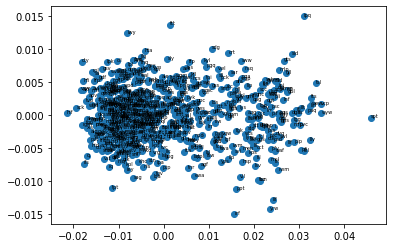

In [41]:
################## Tür Seçenekleri Gösteriliyor #################3
print("*******************************")
print("1: Cytomegalovirus")
print("2: Epstein-Barr virus")
print("3: hepatitis_B")



print("******************************")


########## Antijen Aranacak Tür seçiliyor #############
ant = int(input(("Antijen Tespiti Yapılacak Türü Seçiniz: ")))
print("Seçim: " , ant)

########## Antijen Yapılacak Tür Seçildikten Sonra Seçilen Türün İçerisinde Antijen Tespit Etme İşlemleri Başlıyor#########

if ant == 1:
    print("Cytomegalovirus")
    
    
    text = 'aee sde eea iva ytl aaa gvs ssd slv spp esp vpa tip lss viv aen sdq ees eqs dee eee gaq eer edt vsv kse p. krp lit kpe vis vmk rri eei cmk vfa qyn lga dpl rvc sps vdd lra ipe esd eee aiv ayt lat agv sss dsl vsp pes pvp ati pls svi vae nsd qee seq sde eee ega qee red tvs vks ep. nlv pmv atv qgq nlk yqe ffw dan diy rif ael egv wqp aaq pk. mes sak rkm dpd npd egp spk vpr pet pvt kat tfl qtm lrk evn sql slg dpl fpe lae esl ktf eqv ted cne npe kdv lae lvk qik vrv dmv rhr . msl qfi glq rrd vva lvn flr hlt qkp dvd lea hpk ilk kcg ekr lhr rtv lfn elm lwl gyy rel rfh npd lss vle efe vrc vav arr gyt ypf gdr gka rdh lav ldr tef dtd vrh dae ive ral vsa vil akm svr etl vta igq tep iaf vhl kdt evq rie enl egv rrn mfc vkp ldl nld rha nta lvn avn klv ytg rli mnv rrs wee ler kcl ari qer ckl lsr sca caf pli ptt vai sss tpw ktg dsa dtl lel lie dfd iyv dsf pqs aht flg ars psl efd dda nll slg ggs afs svp kkh vpt qpl dgw swi asp wkg hkp frf eah gsl apa aea haa rsa avg yyd eee krr erq krv dde vvq rek qql kaw eer qqn lqq rqq qpp ppa rkp sas rrl fgs sad edd ddd dde kni ftp ikk pgt sgk gaa sgg gvs sif sgl lss gsq kpt sgp lni pqq qqr haa fsl vsp qvt kas pgr vrr dsa wdv rpl tet rgd lfs gde dsd ssd gyp pnr qdp rft dtl vdi tdt ets akp pvt tay kfe qpt ltf gag vnv pag aga ail tpt pvn pst apa pap tpt fag tqt pvn gns pwa pta plp gdm npa nwp rer awa lkn phl ayn pfr mpt tst asq ntv stt prr pst pra avt qta srd aad evw alr dqt aes pve dse eed dds sdt gsv vsl ght tps sdy nnd vis pps qtp eqs tps rir kak lss pmt tts tsq kpv lgk rva tph asa raq tvt stp vqg rle kqv sgt pst vpa tll qpq pas skt tss rnv tsg agt ssa ssa rqp sas asv lsp ted dvv spa tsp lsm lss asp spa ksa pps pvk grg srv gvp slk ptl ggk avv grp psv pvs gsa pgr lsg ssr aas ttp typ avt tvy pps sta kaa yrn app vas psi lkp gas aal qsr rst gta avg spv kst tgm ktv afd lss pqk sgt gpq pgs agm gga ktp sda vqn ilq kie kik nte e. vem afa yal alf aaa rqe eag aqv svp ral drq aal lqi qef mit cls qtp prt tll lyp tav dla kra lwt pnq itd its lvr lvy ils kqn qqh lip qwa lrq iad fal klh kth . vem afa yal alf aaa rqe eag aqv svp ral drq aal lqi qef mit cls qtp prt tll lyp tav dla kra lwt pnq itd its lvr lvy ils kqn qqh lip qwa lrq iad fal klh kth . vem afa yal alf aaa rqe eag aqv svp ral drq aal lqi qef mit cls qtp prt tll lyp tav dla kra lwt pnq itd its lvr lvy ils kqn qqh lip qwa lrq iad fal klh kth . vem afa yal alf aaa rqe eag tei sip ral drq aal lqi qef mit cls qtp prt tll lyp tav dla kra lwt pdq itd its lvr lvy ils kqn qqh lip qwa lrq iad fal qlh kth . vem afa yal alf aaa rqe eag tei sip ral drq aal lqi qef mit cls qtp prt tll lyp tav dla kra lwt pdq itd its lvr lvy ils kqn qqh lip qwa lrq iad fal qlh kth . vem afa yal alf aaa rqe eag tei sip ral drq aal lqi qef mit cls qtp prt tll lyp tav dla kra lwt pdq itd its lvr lvy ils kqn qqh lip qwa lrq iad fal qlh kth . vem afa yal alf aaa rqe eag aqv svp ral drq aal lqi qef mit cls qtp prt tll lyp tav dla kra lwt pnq itd its lvr lvy ils kqn qqh lip qwa lrq iad fal klh kth . vem afa yal alf aaa rqe eag tei sip ral drq aal lqi qef mit cls qtp prt tll lyp tav dla kra lwt pdq itd its lvr lvy ils kqn qqh lip qwa lrq iad fal qlh kth . srq lka qds lge qpt tvp ppi dls iph vwm ppq ttp hgw tes htt sgl hrp hfn qtc ilf dgh dll fst vtp clh qgf yli del ryv kit lte dff . sqq lka qds lge qpt tvp ppi dls iph vwm ppq ttp hgw tes htt sgl hrp hfn qtc ilf dgh dll fst vtp clh qgf yli del ryv kit lte dff . sqq lka qds lge qpt tvp ppi dls iph vwm ppq ttp hgw tes htt sgl hrp hfn qtc ilf dgh dll fst vtp clh qgf yli del ryv kit lte dff . sqq lka qds lge qpt tvp ppi dls iph vwm ppq ttp hdw kgs htt sgl hrp hfn qtc ilf dgh dll fst vtp clh qgf ylm del ryv kit lte dff . sqq lka qds lgq qpt tvp ppi dls iph vwm ppq ttp hdw kgs htt sgl hrp hfn qtc ilf dgh dll fst vtp clh qgf ylm del ryv kit lte dff . sqq lka qds lgq qpt tvp ppi dls iph vwm ppq ttp hdw kgs htt sgl hrp hfn qtc ilf dgh dll fst vtp clh qgf ylm del ryv kit lte dff . sqq lka qds lgq qpt tvp ppi dls iph vwm ppq ttp hdw kgs htt sgl hrp hfn qtc ilf dgh dll fst vtp clh qgf ylm del ryv kit lte dff . mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qpp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsl dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv sea ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tas kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vat fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yqs qsv ltw the cnt ten gsf lag yeg fgw dge tlm efk dnl tlw tgp dyk isw lrq nkt yid gki kni seg dtt iqr nyl mgn cte wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg nka pdd sep qcn pll ptf dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif ngq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele itl gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise edt ttq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isi tsp dds ssg evp dhp tas kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv rmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise edt ttq rny lkg nct qws viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg kin itf ihy gdk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yrs qsv ltw the cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dta iqr nyl mgn cte wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg nka pdd sep qcn pll ptf dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal flc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fla gye gfg wdg etl mef kdn ltl wtg pny eis wlr qnk tyi dgk ikn ise edt ttq rny lkg nct qws viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fla gye gfg wdg etl mef kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf lag yeg fgw dgq tlm elk dnl tlw tgp dye isw lrq nkt yid gkv kni see dtt iqr nyl mgn cte wsv iys rfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptf dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yrs qsv ltw the cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dta iqr nyl mgn cte wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg nka pdd sep qcn pll ptf dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yqs qsv ltw the cnt ten gsf lag yeg fgw dge tlm efk dnl tlw tgp dyk isw lrq nkt yid gki kni see dtt tqr nyl kgn ctq wsv iys gfq tpi thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele itl gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt iiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isi tsp dds ssg evp dhp tas kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsl dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv rmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg kin itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qpp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yrs qsv ltw the cnt ten gsf lag yeg fgw dge tlm efk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl mgn cte wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yrs qsv ltw the cnt ten gsf lag yeg fgw dge tlm efk dnl tlw tgp nye isw lkq nkt yid gki kni see dtt tqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg dkv pdd sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fla gye gfg wdg etl mef kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsl dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fla gye gfg wdg etl mef kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gnk ape dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn y. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn y. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yqs qsv ltw the cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg nka pdd sep qcn pll ptf dgt fhq gcy val fcn qny . mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn y. mmt twc ltl fvl wml rvv rmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yrs qsv ltw the cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny . mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yqs qsv ltw the cnt ten gsf lag yeg fgw dge tlm efk dnl tlw tgp dyk isw lrq nkt yid gki kni seg dtt iqr nyl mgn cte wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg nka pdd sep qcn pll ptf dgt fhh gcy vai fcn qny . mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk lpe dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn y. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yrs qsv ltw the cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dta iqr nyl mgn cte wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg nka pdd sep qcn pll ptf dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qpp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tsn kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss dka ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei tlg yrs qsv ltw the cnt ten gsf vag yeg fgw dge tlm ele nnl tlw tgp nye isw lkq nkt yid gki kni see dtt tqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg nkv ped sep qcn pll ptf dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tsn kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tas kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv rmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vat fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wah ecn tte ngs fla gye gfg wdg etl mef kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt iiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yrs qsv ltw the cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dta iqr nyl mgn cte wsv iys gfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg nka pdd sep qcn pll ptf dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mef kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt ldg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fml wml rvv rmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdr tss ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fla gye gfg wdg etl mef kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg kin itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyq sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gdk vpe dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isi tsp dds ssg evp dhp tas kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf lag yeg fgw dgq tlm elk dnl tlw tgp dye isw lrq nkt yid gki kni see dtt iqr nyl mgn cte wsv iys rfq tpv thp vvk ggv rnh ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptf dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lmg nct ews viy sgf qtp vth pvv kgg vrn hnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg era kgd lif nqt eqn lle lei alg yrs qsv ltw the cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ask ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt mwc ltl fvl wml rvv gmh vlr ygy tgi fdd tsh mtl tvv gif dgq hff tyh vns sdk ass ran gti swm anv saa ypt yld ger akg dli fnq teq nll ele ial gyr sqs vlt wth ecn tte ngs fva gye gfg wdg etl mel kdn ltl wtg pny eis wlk qnk tyi dgk ikn ise gdt tiq rny lkg nct qws viy sgf qtp vth pvv kgg vrn qnd nra eaf cts ygf fpg ein itf ihy gnk apd dse pqc npl lpt fdg tfh qgc yva ifc nqn ytc rvt hgn wtv eip isv tsp dds ssg evp dhp tan kry ntm tis svl lal llc all faf lhy ftt lkq ylr nla faw ryr kvr ss. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vat fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s. mmt twc ltl fvl wml rvv gmh vlr ygy tgi fge shm tlt vvg ifd gqh fft yhv nss drt ssr ang tis wma nvs aay pty ldg eka kgd lif nqt eqn lle lei alg yqs qsv ltw ihe cnt ten gsf vag yeg fgw dge tlm elk dnl tlw tgp nye isw lkq nkt yid gki kni seg dtt iqr nyl kgn ctq wsv iys gfq tpv thp vvk ggv rnq ndn rae afc tsy gff pge ini tfi hyg dkv ped sep qcn pll ptl dgt fhq gcy vai fcn qny tcr vth gnw tve ipi svt spd dss sge vpd hpt ank ryn tmt iss vll all lca llf afl hyf ttl kqy lrn laf awr yrk vrs s.'
    
   
    #remove extra characters
    text = re.sub(r"[[0-9]*\]", " ", text)
    #remove the extra spaces between words
    text = re.sub(r"\s+", " ", text)
    #convert all letters to lowercase
    text = text.lower()
    
    #tokenize the text to list of sentences
    tokenized_sentence = nltk.sent_tokenize(text)
    #tokenize the list of sentences to list of words
    tokenized_words = [nltk.word_tokenize(sentence) for sentence in tokenized_sentence]
    #define the english stopwords
    stop_words = stopwords.words('english') 
    #remove the stop words from the text
    for i, _ in enumerate(tokenized_words):
        tokenized_words[i] = [word for word in tokenized_words[i] if word not in stop_words]
    
    
    #invoke the Word2Vec with the tokenized words as argument    
    model_1= Word2Vec(tokenized_words, window=2, min_count=1)
    
    #return the list of words learned
    learned_words = list(model_1.wv.vocab)
    #print the learned words
    #print(learned_words)
    
    model_1.wv.save('model_1.bin')
    
    #retrive the vectors from the model 
    vectors = model_1[model_1.wv.vocab]
    #instantiate the PCA class with 2 dimensions
    pca = PCA(n_components=2)
    #train the model 
    result = pca.fit_transform(vectors)
    #plot a scatter plot
    plt.scatter(x=result[:, 0], y=result[:, 1])
    #add annotations of the words to the data points
    words = list(model_1.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, size=5, xy=(result[i, 0], result[i, 1]))
        
        
    
    
    liste_benzerlikler =[]

    for j in range(len(liste_yeni)-1):
        if var_mi(liste_yeni[j]) and var_mi(liste_yeni[j+1]):
        
            a = model_1.wv.similarity(liste_yeni[j], liste_yeni[j+1])
        
            liste_benzerlikler.append(a)
        
        else:
            liste_benzerlikler.append(0)
        
    #print(liste_benzerlikler)  
    #print(len(liste_benzerlikler))

    
    th = 110
    toplam = 0
    antijen_dizi = []

    for x in range(len(liste_benzerlikler)-th):
        for y in range(x, x+110):
            toplam += liste_benzerlikler[y]
        antijen_dizi.append(toplam)
        toplam = 0
    
    index_min = np.argmin(antijen_dizi)
    index_max = np.argmax(antijen_dizi)
    
    #print(index_min, "min_index")
    #print(index_max, "max_index")
    
    
    print("Tahmin Edilen Antijen Dizilimi")
    result = ""
    for k in range(index_max, index_max+th):
    #print(liste_yeni[k])
        result += liste_yeni[k] + " "
    print("******************************")
    print(result)
    print("******************************")  
    
elif ant == 2:
    print("Epstein-Barr virus")
    
    text = 'gsq isn tem yim yam air qai rdr rrn pas rrd qak wrl qtl aag wpm gyq ays swm ysy tdh qta ptf vql qat lgc tgg rrc hvt fsa gtf kpp rct pgd rqw lyv qss vgn ivq scn pry sif fdy mai hrs ltk iwe evl tpd qrv sfm efl gfl qrt dls yik sfv sda lgt tsi qtp wid dns ste taq awn agf lrg ray gld llr teg ehv ega tge tre ese dae sdg dde dal dls ihg rpc pqa pew pvq eeg gqd ate vld lsi hgr prp rtp ewp vqg egg . gsq isn tem yim yam air qai rdr rrn pas rrd qak wrl qtl aag wpm gyq ays swm ysy tdh qtt ptf vhl qat lgc tgg rrc hvt fsa gtf klp rct pgd rqw lyv qss vgn ivq scn pry sif fdy mai hrs ltk iwe evl tpd qrv sfm efl gfl qrt dls yik sfv sda lgt tsi qtp wid dnp ste taq awn agf lrg ray gld llr teg ehv ega tge tre ese dae sdg dde dal dls ihg rpc pqa pew pvq eeg gqd ate vld lsi hgr prp rtp ewp vqg egg . gsq isn tem yim yam air qai rdr rrn pas rrd qak wrl qtl aag wpm gyq ays swm ysy tdh qtt ptf vhl qat lgc tgg rrc hvt fsa gtf kpp rct pgd rqw lyv qss vgn ivq scn pry sif fdy mai hrs ltk iwe evl tpd qrv sfm efl gfl qrt dls yik sfv sda lgt tsi qtp wid dns ste taq awn agf lrg ray gld llr teg ehv ega tge tre ese dte sdg dde dal dls ihg rpc pqa pew pvq eeg gqd ate vld lsi hgr prp rtp ewp vqg egg . gsq isn tem yim yam air qai rdr rrn pas rrd qak wrl qtl aag wpm gyq ays swm ysy tdh qta ptf vql qat lgc tgg rrc hvt fsa gtf kpp rct pgd rqw lyv qss vgn ivq scn pry sif fdy mai hrs ltk iwe evl tpd qrv sfm efl gfl qrt dls yik sfv sda lgt tsi qtp wid dns ste taq awn agf lrg ray gld llr teg ehv ega ige tre ese dte sdg dde dal dls ihg rpc pqa pew pvq eeg gqd ate vld lsi hgr prp rtp ewp vqg egg . add pge gps tgp rgq gdg grr kkg gwf gkh rgq ggs npk fen iae glr tll ars hve rtt deg twv agv fvy ggs kts lyn lrr gia lai pqc rlt pls rlp fgm apg pgp qpg plr esi vcy fiv flq thi fae glk dai kdl vmp kpa ptc nik atv csf ddg vdl ppw fpp mve gaa aeg ddg ddg ddg deg gdg deg eeg qe. add pge gps tgp rgq gdg grr kkg gwf gkh rgq ggs npk fen iad glr all ars hve rtt deg twv agv fvy ggs kts lyn lrr gta lai pqc rlt pls rlp fgm apg pgp qpg plr esi vcy fmv flq thi fae vlk dai kdl vmt kpa ptc nir vtv csf ddg vdl ppw fpp mve gaa aeg ddg ddg deg gdg deg deg qe. add pge gps tgp rgq gdg grr kkg gwf gkh rgq ggs nqk fen iae glr tll arc hve rtt deg twv agv fvy ggs kts lyn lrr gia lai pqc rlt pls rlp fgm apg pgp qpg plr esi vcy fiv flq thi fae glk dai kdl vmp kpa ptc nik atv csf ddg vdl ppw fpp mve gaa aeg ddg ddg deg gdg deg eeg qe. add pge gps tgp rgq gdg grr kkg gwf gkr rge ggs nqk fen iae glr lll arc hve rtt edg nwv agv fvy ggs kts lyn lrr gig lai pqc rlt pls rlp fgm apg pgp qpg plr esi vcy fiv flq thi fae glk dai kdl vlp kpa ptc nir vtv csf ddg vdl ppw fpp mve gaa aeg ddg ddg deg gdg deg eeg qe. may str eil lal cir dsr vhg ngt lhp vle laa ret plr lsp edt vvl ryh vll eei ier nse tft etw nrf ith teh vdl dfn svf lei fhr gdp slg ral awm awc mha crt lcc nqs tpy yvv dls vrg mle ase gld gwi hqq ggw stl ied nip gsr rfs wtl fla glt lsl lvi csy lfi srg rh. msd egp gtg pgn glg ekg dts gpe gsg gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg thg gtg aga gag gtg agg aga ggg aga ggg aga ggg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg gag agg gag agg gag agg aga gga gag gag agg gag agg aga gga gag gag agg aga gga gag ggg rgr ggs ggr grg gsg grg rgg sgg rrg rgr era rgr sre rar grg rgr gek rpr sps sqs sss gsp prr ppp grr pff hpv gda dyf eyl qeg gpd gep dvp pga ieq gpt ddp geg pst gpr gqg dgg rrk kgg wfg khr gqg gsn pkf eni aeg lrv lla rsh ver tte egn wva gvf vyg gsk tsl ynl rrg ial avp qcr itp lsr lpf gma pgp gpq pgp lre siv cyf mvf lqt hif aev lkd aik dlv mtk pap tcn ikv tvc sfd dgv dlp pwf ppm veg aaa egd dgd dgd egg dgd ege egq e. msd egp gtg pgn glg ekg dts gpe gsg gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg thg gtg aga gag gtg agg aga ggg aga ggg aga ggg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg gag agg gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga ggg aga ggg aga gga gag gga gag gag agg aga gga gag gag agg ggr grg gsg grg rgg sgg rgr ggs ggr rgr gre rar ggs rer arg rgr grg ekr prs pss qss ssg spp rrp ppg rrp ffh pvg dad yfe ylq egg pdg epd vpp gai eqg ptd dpg egp stg prg qgd ggr rkk ggw fgk hrg qgg snp kfe nia egl rvl lar shv ert tee gnw vag vfv ygg skt sly nlr rgi ala vpq cri tpl srl pfg map gpg pqp gpl res ivc yfm vfl qth ifa evl kda ikd lvm tkp apt cni kvt vcs fdd gvd lpp wfp pmv ega aae gdd gdd gde ggd gde gee gqe . msd egp gtg pgn glg ekg dts gpe gsg gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg thg gtg aga gag gtg agg aga gga gag gga gag gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga ggg aga ggg aga gga gag gga gag gga gag gga gag gag agg aga gga gag gag agg aga ggg aga gga gag gag agg aga gga gag ggg rgr ggs ggr grg gsg grg rgg sgg rrg rgr era rgg sre rar grg rgr gek rpr sps sqs sss gsp prr ppp grr pff hpv gda dyf eyl qeg gpd gep dvp pga ieq gpt ddp geg pst gpr gqg dgg rrk kgg wfg khr gqg gsn pkf eni aeg lrv lla rsh ver tte egn wva gvf vyg gsk tsl ynl rrg ial avp qcr itp lsr lpf gma pgp gpq pgp lre siv cyf mvf lqt hif aev lkd aik dlv mtk pap tcn ikv tvc sfd dgv dlp pwf ppm veg aaa egd dgd dgd egg dgd ege egq e. msd egp gtg pgn glg ekg dts gpe gsg gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg thg gtg aga gag gtg agg gag agg gag agg gag agg gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg aga gga gag gag agg gag agg gag agg gag agg aga gga gag gag agg gag agg aga gga gag gag agg aga gga gag gag agg aga ggg grg rgg sgg rgr ggs ggr grg gsg grr grg rer arg gsr era rgr grg rge krp rsp ssq sss sgs ppr rpp pgr rpf fhp vgd ady fey lqe ggp dge pdv ppg aie qgp tdd pge gps tgp rgq gdg grr kkg gwf gkh rgq ggs npk fen iae glr vll ars hve rtt eeg nwv agv fvy ggs kts lyn lrr gia lav pqc rit pls rlp fgm apg pgp qpg plr esi vcy fmv flq thi fae vlk dai kdl vmt kpa ptc nik vtv csf ddg vdl ppw fpp mve gaa aeg ddg ddg deg gdg deg eeg qe. msd egp gtg pgn glg qke dts gpd gss gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg ahg gtg agg gag agg aga gga gag gag agg aga gga gag gag agg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga gge grr aga gga gag gga gag gag agg gag agg gag agg gag agg gag agg gag agg gag agg gag agg gag agg eag rgg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg grg rgg sgg rgr ggs ggr grg gsg grg rgr era rgg sre rar grg rgr gek rpr sps sqs sss gsp prr ppp grr pff hpv gea dyf eyh qeg gpd gep dmp pga ieq gpa ddp geg pst gpr gqg dgg rrk kgg wfg khr gqg gsn qkf eni aeg lrt lla rch ver ttd egt wva gvf vyg gsk tsl ynl rrg ial aip qcr ltp lsr lpf gma pgp gpq pgp lre siv cyf ivf lqt hif aeg lkd aik dlv mpk pap tcn ika tvc sfd dgv dlp pwf ppm veg aaa egd dgd dgd dgd egg dgd ege egq e. msd egp gtg pgn glg qke dts gpd gss gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg ahg gtg agg gag agg aga gga gag gag agg aga gga gag gag agg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga ggg aga gga gag gga gag gga gag gga gag gga gag gga gag gga gag gag agg gag agg gag agg gag agg gag agg gag agg gag agg gag agg gag agg gag agg gag agg gag agg gag agg gag agg ggr grg gsg grg rgg sgg rgr ggs ggr grg rer arg gsr era rgr grg rge krp rsp ssq sss sgs ppr rpp pgr rpf fhp vge ady fey hqe ggp dge pdm ppg aie qgp add pge gps tgp rgq gdg grr kkg gwf gkh rgq ggs nqk fen iae glr tll arc hve rtt deg twv agv fvy ggs kts lyn lrr gia lai pqc rlt pls rlp fgm apg pgp qpg plr esi vcy fiv flq thi fae glk dai kdl vmp kpa ptc nik atv csf ddg vdl ppw fpp mve gaa aeg ddg ddg ddg deg gdg deg eeg qe. msd egp gtg pgn glg qke dss gpe gsg gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg ahg gtg aga gag gag agg aga ggg aga ggg agg agg agg aga ggg aga ggg agg agg aga ggg aga ggg agg aga ggg agg agg aga ggg aga ggg agg aga ggg agg agg aga ggg aga gga gga gga gag gag agg gag gag gag agg aga gga gag gag agg agg aga gga gga gag gag gag agg gag gag agg gag gag agg agg aga gga gga gag gag gag agg gag agg aga ggg grg rgg sgg rgr ggs ggr grg gsg grr grg rer arg rsr era rgr grg rge krp rsp ssq sss sgs ppr rpp pgr rpf fhp vgd ady fey lqe ggp dge pdv ppg aie qgp tdd pge gps tgp rgq gdg grr kkg gwf gkh rgq ggs npk fen iae glr vll ars hve rtt eeg nwv agv fvy ggs kts lyn lrr gia lav pqc rit pls rlp fgm apg pgp qpg plr esi vcy fmv flq thi fae vlk dai kdl vmt kpa ptc nik vtv csf ddg vdl ppw fpp mve gaa aeg ddg ddg deg gdg deg eeg qe. msd egp gtg pgn glg qke dss gpe gsg gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg ahg gtg aga gag gag agg aga ggg aga ggg agg agg agg aga ggg aga ggg agg agg aga ggg aga ggg agg aga ggg agg agg aga ggg aga ggg agg aga ggg agg agg aga ggg aga gga gga gga gag gag agg gag gag gag agg aga gga gag gag agg agg aga gga gga gag gag gag agg gag gag agg gag gag agg agg aga gga gga gag gag gag agg gag agg aga ggg grg rgg sgg rgr ggs ggr grg gsg grr grg rer arg rsr era rgr grg rge krp rsp ssq sss sgs ppr rpp pgr rpf fhp vgd ady fey lqe ggp dge pdv ppg aie qgp tdd pge gps tgp rgq gdg grr kkg gwf gkh rgq ggs npk fen iae glr vll ars hve rtt eeg nwv agv fvy ggs kts lyn lrr gia lav pqc rit pls rlp fgm apg pgp qpg plr esi vcy fmv flq thi fae vlk dai kdl vmt kpa ptc nik vtv csf ddg vdl ppw fpp mve gaa aeg ddg ddg deg gdg deg eeg qe. msd egp gtg pgn glg qke dss gpe gsg gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg ahg gtg aga gag gag agg aga ggg aga ggg agg agg agg aga ggg aga ggg agg agg aga ggg aga ggg agg aga ggg agg agg aga ggg aga ggg agg aga ggg agg agg aga ggg aga gga gga gga gag gag agg gag gag gag agg aga gga gag gag agg agg aga gga gga gag gag gag agg gag gag agg gag gag agg agg aga gga gga gag gag gag agg gag agg aga ggg grg rgg sgg rgr ggs ggr grg gsg grr grg rer arg rsr era rgr grg rge krp rsp ssq sss sgs ppr rpp pgr rpf fhp vgd ady fey lqe ggp dge pdv ppg aie qgp tdd pge gps tgp rgq gdg grr kkg gwf gkh rgq ggs npk fen iae glr vll ars hve rtt eeg nwv agv fvy ggs kts lyn lrr gia lav pqc rit pls rlp fgm apg pgp qpg plr esi vcy fmv flq thi fae vlk dai kdl vmt kpa ptc nik vtv csf ddg vdl ppw fpp mve gaa aeg ddg ddg deg gdg deg eeg qe. msd egp gtg pgn glg qke dss gpe gsg gsg pqr rgg dnh grg rgr grg rgg grp gap ggs gsg prh rdg vrr pqk rps cig ckg ahg gtg aga gag gag agg aga ggg aga ggg agg agg agg aga ggg aga ggg agg agg aga ggg aga ggg agg aga ggg agg agg aga ggg aga ggg agg aga ggg agg agg aga ggg aga gga gga gga gag gag agg gag gag gag agg aga gga gag gag agg agg aga gga gga gag gag gag agg gag gag agg gag gag agg agg aga gga gga gag gag gag agg gag agg aga ggg grg rgg sgg rgr ggs ggr grg gsg grr grg rer arg rsr era rgr grg rge krp rsp ssq sss sgs ppr rpp pgr rpf fhp vgd ady fey lqe ggp dge pdv ppg aie qgp tdd pge gps tgp rgq gdg grr kkg gwf gkh rgq ggs npk fen iae glr vll ars hve rtt eeg nwv agv fvy ggs kts lyn lrr gia lav pqc rit pls rlp fgm apg pgp qpg plr esi vcy fmv flq thi fae vlk dai kdl vmt kpa ptc nik vtv csf ddg vdl ppw fpp mve gaa aeg ddg ddg deg gdg deg eeg qe. ddp geg pst gpr gqg dgg rrk kgg wfg khr gqg gsn pkf eni aeg lra lla rsh ver ttd egt wva gvf vyg gsk tsl ynl rrg tal aip qcr ltp lsr lpf . lrg ray gld llr teg ehv ega tge tre ese dte sdg dde dlp civ srg gpk vkr ppi fir rlh rll lmr agk rte qgk evl eka rgs tyg tpr ppv pkp rpe vpq sde tat shg saq vpe ppt ihl aaq gma ypl heq hgm apc lva qap ptp lpp vsp gdq lpg vss egr vac apv pap agp ivr pwe psl tqa agq afa pvr pqh mpv epv pvp tva ler pvy pkp vrp app kia mqg pge tsg irr are rwr pap wtp npp rsp sqm svr drl arl rae aqv kqa sve vqp pql tqv spq qpm egp lvp eqq mfp gap fsq vad vvq apg vpa mqp qyf dlp liq pis qga pva plr asm gpg irr are rwr pap wtp npp rsq gas aah flp qqp meg plv peq wmf pga als qsv rqg vaq sqy fdl plt qpi nhg apa ahf lhq ppm egp wvp eqw mfq gap psq gtd vvq hql dvl gyp lhv lnh pgv pvs pav nqy hls qaa fgl pid ede sge gsd tse pce ald lsi hgr pcp qap ewp vqe egg qda tev ldl sih grp rpr tpe wpv qge ggq nvt gpe trr vvv sav vhm cqd def pdl qdp pde a. lrg ray gld llr teg ehv ega tge tre ese dte sdg dde dlp civ srg gpk vkr ppi fir rlh rll lmr agk rte qgk evl eka rgs tyg tpr ppv pkp rpe vpq sde tat shg saq vpe ppt ihl aaq gma ypl heq hgm apc pva qap ptp lpp vsp gdq lpg vss dgr vac apv pap agp ivr pwe psl tqa agq afa pvr pqh mpv epv pvp tva ler pvy pkp vrp app kia mqg pge tsg irr are rwr pap wtp npp rsp sqm svr drl arl rae aqv kqa sve vqp pql tqv spq qpm egp lvp eqq mfp gap fsq vad vvr apg vpa mqp qyf dlp liq pis qga pva plr asm gpg irr are rwr pap wtp npp rsq gas aah flp qqp meg plv peq wmf pga als qsv rqg vaq sqy fdl plt qpi nhg apa ahf lhq ppm egp wvp eqw mfq gap psq gtd vvq hql dal gyt lhg inh pgv pvs pav nqy hls qaa fgl pid ede sge gsd tse pce ald lsi hgr pcp qap ewp vqe egg qda tev ldl sih grp rpr tpe wpv qge ggq nvt gpe trr vvv sav vhm cqd def pdl qdp pde a. kkg gwf gkh rgq ggs nqk fen iad glr tll arc hve rtt deg iwv agv fvy ggs kts lyn lrr gia lai pqc rlt pls rlp fgm apg . lrg ray gld llr teg ehv ega tge tre ese dte sdg dde dlp civ srg gpk vkr ppi fir rlh rll lmr agk rte qgk evl eka rgs tyg tpr ppv pkp rpe vpq sde tat shg saq vpe ppt ihl aaq gma ypl heq hgm apc pva qap ptp lpp vsp gdq lpg vss dgr vac apv pap agp ivr pwe psl tqa agq afa pvr pqh mpv epv pvp tva ler pvy pkp vrp app kia mqg pge tsg irr are rwr pap wtp npp rsp sqm svr drl arl rae aqv kqa sve vqp pql tqv spq qpm egp lvp eqq mfp gap fsq vad vvr apg vpa mqp qyf dlp liq pis qga pva plr vpe qqm fpg aat qpq yfd ipl tep inq gas aah flp qqp meg plv pdq wmf pga als qsv rqg vaq sqy fdl plt qpi nhg apa ahf lhq ppm egp wvp eqw mfq gap psq gtd vvq hql dal gyp lha lnh pgv pvs pav nqy hls qaa fde des geg sdt sep cea ldl sih grp cpq ape wpv qge ggq dat evl dls ihg rpr prt pew pvq ges gqn vtd hep irv vvs aiv hmc qdd efp dlq dpp dea . msa prk vrl psv kav dms med maa rla rle sen kal kqq vlr gga cas sts vps apv ppp epl tar qre vmi tqa tgr las qam kki edk vrk svd gvt trn eme nil qnl tlr iqv sml gak gqp spg egt rpr esn dpn atr rar srs rgr eak kvq isd . mpt fyl alh ggq tyh liv dtd svg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp ppp ppp qrr daw tqe psp ldr dpl gyd vgh gpl asa mrm lwm any ivr qsr gdr gli lpq gpq tap qam lvq phv ppl rpt apt ils pls qpr ltp pqp lmm ppr ptp ptp lpp atl tvp prp trp ttl ppt pll tvl qrp tel qpt psp prm hlp vlh vpd qsm hpl thq stp ndp dsp epr spt vfy nip pmp lpp sql ppp aap aqp ppg vin dqq lhh lps gpp wwp pic dpp qps ktq gqs rgq srg rgr grg rgr gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr psi q. mgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp lrp rpr ppa rsl rew llr ird rfe ppp vtt qrq svy iee eed ed. mes feg qgd siq spd ner gdd vqt tge hdq dpg pgp pss gas egl vpe esd srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd itp yta rni rda acr avk qsh lqa lsn lil dsg ldt qhv lcf vma arq rlq dir rgp lva egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gch naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ikd hvi qna frk aql qgl sml atg gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rsd kae aqs tpe qtd yda ste sel d. mkk awl sra qqa dag gas gse dpp dyg dqg nvt qve sep isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm es. mdk drp gpp ald dnm eee vps tsv vqe qvs agd wen vli els dss sek eae dah lep aqk gtk rkr vdh dag gsa par pml ppq pdl pgr eai lrr fpl dlr tll qai gaa atr idt rai dqf fgs qis nte myi mya mai rqa ird rrr npa srr dqa kwr lqt laa gwp mgy qay ssw mys ytd hqt tpt fvh lqa tlg ctg grr chv tfs agt fkp prc tpg drq wly vqs svg niv qsc npr ysi ffd yma ihr slt kiw eei ltp dqr vsf mef lgf lqr tdl syi knf vsd alg tts iqt pwi ddn pst eta qaw nag flr gra ygl dll rte geh veg atg etr ees eda esd gdd edl pci vsr ggp kvk rpp ifi rrl hrl llm rag krt eqg kev lek arg sty gtp rpp vpk prp evp qsd eta tsh gsa qvp epp tih laa qgm ayt lhe qhg map cpv aqa ppt plp pvs pgd qlp gvs sdg rva cap vpa pag piv rpw eps ltq aag qaf apv rpq hmp vep vpv ptv ale rpv ypk pvr pap pkf amq gpg ets gir rar erw rpa pwt pnp prs psq msv rdr lar lra eaq vkq asv evq ptq ltq vsp qqp meg plv peq qmf sga pfs qva dvv rap gvp amq pqy fdl pli qpi sqg apv apl ras mgp vpp vpa tqp qyf dip lte pin qga saa hfl pqq pme gpl vpe rwm fpg aal sqs vrp gva qsq yfd lpl tqp inh gap aah flh qpp meg pwv peq wmf qga pps qgt dvv qhq lda lgy alh gln hpg vpv spa vnq yhl sqa afg lpi ded esg egs dts epc eal dls ihg rpc pqa pew pvq eeg gqd ate vld lsi hgr prp rtp ewp vqg egg qnv tgp etr rvv vsa vvh mcq dde fpd lqd ppd ea. msa prk vrl psv kav dms med maa rla rle sen kal kqq vlr gga cas sts vps apv ppp epl tar qre vmi tqa tgr las qam kki edk vrk svd gvt trn eme nil qnl tlr iqv sml gak gqp spg egt rpn dpn atr rar srs rgr eak kvq isd . mpt fyl alh ggq tyn liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp ppp ppp ppp ppp ppp ppp ppp spp ppp ppp ppp qrr daw tqe psp ldr dpl gyd vgh gpl asa mrm lwm any ivr qsr gdr gli lpq gpq tap qam lvq phv ppl rpt apt ils pls qpr ltp pqp lmm ppr ptp ptp lpp atl tvp prp trp ttl ppt pll tvl qrp tel qpt psp prm hlp vlh vpd qsm hpl thq stp ndp dsp epr spt vfy nip pmp lpp sql ppp aap aqp ppg vin dqq lhh lps gpp wwp pic dpp qps ktq gqs rgq srg rgr grg rgr gkg ksr dkq rkp ggp wrp epn tss psm pel spv lgl hqg qga gds ptp gps naa pvc gns hta tpn vsp ihe pes hns pea pil fpd dwy pps idp adl des wdy ife tte sps sde dyv egp skr prp siq . mgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp lrp rpr ppa rsl rew llr ird rfe ppp vtt qrq svy iee eed ed. mkk awl sra rqa dag gas gse dpp dyg dqg nvq qvg sdp msp eig pfe lsa ase ddp qsg pve enl daa are eqe phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfd rks dak stk kcr aiv tdf svi kti eee hrk kka ait eq. msa prk vrl psv kav dms med maa rla rle sen kal kqq vlr gga cas sts vps apv ppp epl tar qre vmi tqa tgr las qam kki edk vrk svd gvt trn eme nil qnl tlr iqv sml gak gqp spg egt rlr esn dpn atr rar srs rgr eak kvq isd . mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr psi q. mgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp lrp rpr ppa rsl rew llr ird rfe ppp vtt qrq svy iee eed ed. mdk drp gpp ald dnm eee vps tsv vqe qvs agd wen vli els dss sek eae daq lep aqk gtk rkr vdh dag gsa par pml ppq pdl pgr eai lrr fpl dlr tll qai gaa atv rid tra idq ffg sqi snt emy imy ama irq air drr rnp asr rdq akw rlq tla agw pmg yqa yss wmy syt dhq tap tfv qlq atl gct ggr rch vtf sag tfk ppr ctp gdr qwl yvq ssv gni vqs cnp rys iff dym aih rsl tki wee vlt pdq rvs fme flg flq rtd lsy iks fvs dal gtt siq tpw idd nss tet aqa wna gfl rgr ayg ldl lrt ege hve gat get ree sed tes dgd ded lpc ivs rgg pkv krp pif irr lhr lll mra gkr teq gke vle kar gst ygt prp pvp kpr pev pqs det ats hgs aqv pep pti . msa prk vrl psv kav dms med maa rla rle sen kal kqq vlr gga cas sts vps apv ppp epl tar qre vmi tqa tgr las qam kki edk vrk svd gvt trn eme nil qnl tlr iqv sml gak gqp spg egt rlr esn dpn atr rar srs rgr eak kvq isd . mpt fyl alh ggq tyh llv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp ppp ppp ppp ppp ppp ppp ppp ppp ppp ppp spp ppp ppp ppp qrr daw tqe psp ldr dpl gyd vgh gpl asa mrm lwm any ivr qsr gdr gli lpq gpq tap qam lvq phv ppl rpt apt ils pls qpr ltp pqp lmm ppr ptp ptp lpp atl tvp prp trp ttl ppt pll tvl qrp tel qpt psp prm hlp vlh vpd qsm hpl thq stp ndp dsp epr spt vfy nip pmp lpp sql ppp aap aqp ppg vin dqq lhh lps gpp wwp pic dpp qps ktq gqs rgq srg rgr grg rgr gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr psi q. mgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp lrp rpr ppa rsl rew llr ird rfe ppp vtt qrq svy iee eed ed. mes feg egd siq spd nar gdd vqn tge hiq dpg pgp stg gas egl vqn epd srd qqs rgq rrg den rgw mqr irr rrr rra als ghl ldm edn vpp wfp phd itp yva rni rda acq avk hsh lqa lsn lil dsg ldt qhl lcf vma arq rlq dir rgp lvv egg vgw rhw llt sps rsw smg yrt atl rtl tpv pnr vga dsi mlt atf gcq nga lai ntf sat vwi ppp agp req ery are aev rfl rgk wqr rfr rif dli elc gsl hhv wqn mlq tee nll dfv rfm gvm ssc nss svn ywf hkt ign fkp yyp wna ppn enp yha rrg ike qvi qka flk aqr qgl sml atg ggp rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pvr kpr tlp wpt pkt hpv krt ivk tsy rs. mkk awl sra qqa dag gas gse dpp dyg dqg nvq qvg sdp isp aig pfe lsa ase ddp qsg pve enl daa are eee pde qeh ngg ddp lev htr qpr fvd vnp tqa pvi qlv hav yds mlq sdi rsl gsl fle qnl nie efi wmc mtv rhr cqa irq kpl pid kqr rwk lls pyr twr mgy rtq tln vns fet ggd kvh pll vta tlg cee glr hai tys agi vql prm sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtr nrv afv efv gwl ckk dht hir ewf rqc tgr psp skp wmr ahp vav pyd dpl tse etd lay arg lam sie aar lpd dpi ive ddd ese eie dkc dkd eee sgt edv tsi pqt lph spt vyg rps vfy rkp dtk stk kcr aiv tdl sii kvi ede hrk kkt art eq. mdk drp glp apd dni eev pst sgv qer ase gdw env lie isd sss eee aed ahl eps qrg kkr krv ddd agg sap aqh vpp pql dhp gre ail yrf plg lrr fiq aig aaa tvh pdt rai dqf fgs qis ntd lyv mya mai rqa ird rrr npa srr sqv kwr mtt laa gwp mgy qay ssw mys ytd pqv tat iih lqa tlg cas ghr chv tfs agt frp prc spg drq wly vqs rvg dlv qss npc ysi ffd yma ihr slt kiw dev vtp dqr vtf mef lgf lqr tel vyv ksf vsy alg tts iet pwm den pst eta qaw nag llr gra ygq dll rte geh geg atc etr ees edt esd gdd eel prv vsr dgt khr rp. msa prk vrl psv kav dms med maa rla rle sen kal kqq vlr gga cas sts vps apv ppp epl tar qre vmi tqa tgr las qam kki edk vrk svd gvt trn eme nil qnl tlr iqv sml gak gqp spg egt rpr esn dpn atr rar srs rgr eak kvq isd . mpt yyl alh ggq syn liv dtd msg nps lsv ipt npy qeq lsn npl iql qiv vge ntg apa ppq ppp ppp ppp ppe rrd awt qep lpl dmn plg sda sqg pla ssi rml cma qyl lrn arg qqg llr plg pqt rsq vtl erq pvh npr qea pii llq spa ppr ftp vpm val ght lqp tpp prp tlp qpr ipl iip prh tnq pat tpp tap qrl tlg hql slp php pph qst phc ssd stg lpp ppt sys ips mtl spe plp ppa apa hpl pgv iyd qqa lpp tpg ppw wpp vrd ptp ttq tpp tnt kqg pdq gqg rgr wrg rgr skg rgr mhk lpe prr pgp dts sps mpq lsp vvs lhq gqg pen spt pgp sta gpv crv tps atp dis pih epe ssd see ppf lfp sdw ypp tle pae lde swe gif ett esh ssd een vgg psk rpr tst q. mgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp lrp rpq ppa qsl rew llr ise rfd php vat rrq svy iee eed ed. mkk awl sra rqa dag gas gse dpp dyg dqg nvq qvg sgp isp eig pfe lsa ase ddp qsg pve enl daa are eqe phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfd rks dak stk kcr aiv tdf svi kai eee hrk kka ait eq. msa prk vrl psv kav dms med maa rla rle sen kal kqq vlr gga cas sts vps apv ppp epl tar qre vmi tqa tgr las qam kki edk vrk svd gvt trn eme nil qnl tlr iqv sml gak gqp spg egt rlr esn dpn atr rar srs rgr eak kvq isd . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp ppp ppp ppp ppp ppp ppp ppp ppp spp ppp ppp ppp qrr daw tqe psp ldr dpl gyd vgh gpl asa mrm lwm any ivr qsr gdr gli lpq gpq tap qam lvq phv ppl rpt apt ils pls qpr ltp pqp lmm ppr ptp ptp lpp atl tvp prp trp ttl ppt pll tvl qrp tel qpt psp prm hlp vlh vpd qsm hpl thq stp ndp dsp epr spt vfy nip pmp lpp sql ppp aap aqp ppg vin dqq lhh lps gpp wwp pic dpp qps ktq gqs rgq srg rgr grg rgr gkg ksr dkq rkp ggp wrp epn tss psm pel spv lgl hqg qga gds ptp gps naa pvc gns hta tpn vsp ihe pes hns pea pil fpd dwy pps idp adl des wdy ife tte sps sde dyv egp skr prp siq . mgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp lrp rpr ppa rsl rew llr ird rfe ppp vtt qrq svy iee eed ed. mes feg egd siq spd nar gdd vqn tge hiq dpg pgp stg gas egl vqn epd srd qqs rgq rrg den rgw mqr irr rrr rra als ghl ldm edn vpp wfp phd itp yva rni rda acq avk hsh lqa lsn lil dsg ldt qhl lcf vma arq rlq dir rgp lvv egg vgw rhw llt sps rsw smg yrt atl rtl tpv pnr vga dsi mlt atf gcq nga lai ntf sat vwi ppp agp req ery are aev rfl rgk wqr rfr rif dli elc gsl hhv wqn mlq tee nll dfv rfm gvm ssc nss svn ywf hkt ign fkp yyp wna ppn enp yha rrg ike qvi qka flk aqr qgl sml atg ggp rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pvr kpr tlp wpt pkt hpv krt ivk tsy rsd eae eaq stp . mkk awl sra qqa dag gas gse dpp dyg dqg nvq qvg sdp isp aig pfe lsa ase ddp qsg pve enl daa are eee pde qeh ngg ddp lev htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rsl gsl fle qnl nie efi wmc mtv rhr cqa irq kpl pid kqr rwk lls pyr twr mgy rtq tln vns fet ggd kvh pll vta tlg cee glr hai tys agi vql prm sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtr nrv afv efv gwl ckk dht hir ewf rqc tgr psp skp wmr ahp vav pyd dpl tse etd lay arg lam sie aar lpd dpi ive ddd ese eie dkc dkd eee sgt edv tsi pqt lph spt vyg rps vfy rkp dtk stk kcr aiv tdl sii kvi ede hrk kkt art eqp rak pds pap . msa prk vrl psv kav dms med maa rla rle sen kal kqq vlr gga cas sts vps apv ppp epl tar qre vmi tqa tgr las qam kki edk vrk svd gvt trn eme nil qnl tlr iqv sml gak gqp spg egt rpr esn dpn atr rar srs rgr eak kvq isd . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp ppp ppp ppp ppp ppp ppp ppp ppp spp ppp ppp ppp qrr daw tqe psp ldr dpl gyd vgh gpl asa mrm lwm any ivr qsr gdr gli lpq gpq tap qam lvq phv ppl rpt apt ils pls qpr ltp pqp lmm ppr ptp ptp lpp atl tvp prp trp ttl ppt pll tvl qrp tel qpt psp prm hlp vlh vpd qsm hpl thq stp ndp dsp epr spt vfy nip pmp lpp sql ppp aap aqp ppg vin dqq lhh lps gpp wwp pic dpp qps ktq gqs rgq srg rgr grg rgr gkg ksr dkq rkp ggp wrp epn tss psm pel spv lgl hqg qga gds ptp gps naa pvc rns hta tpn vsp ihe pes hns pea pil fpd dwy pps idp adl des wdy ife tte sps sde dyv egp skr prp siq . mgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp rgd rse vpg par pgp pgi gpe gpl gql lrr hrs psp trg gqe prr vrr rvl vqq eee vvs gsp sgp lrp rpr ppa rsl rew llr ird rfe ppp vtt qrq svy iee eed ed. qty dli vdt dsl gnp sls vip snp yqe qls gtp lip lti fvg ent gvp ppp ppp ppp ppp ppp ppp ppp ppp spp ppp ppp ppp qrr . mah ard kag avl ami lic ets liw tss gss tas agn vtg tta vtt psp sas gps tnq stt ltt tsa pit tta lls tnt ttv tst gtt vtp vpt tsn ast inv ttk vta qni tat eag tgt stg vts nvt trs stt asa ttr itn att lap tls skg tsn atk tta elp tvp der qps lsy glp lwt lvf vgl tfl mli lif aag lmm stk nkp lde all tna vtr dps lyk glv . met tqt lrf ktk ala vls kcy dha qth lkg gvl qvn lls vny ggp rla ava nag tag lis fev spd ava ewq nhq spe eap aav sfr nla ygr tcv lgk elf gsa veq asl qfy krp qgg srp efv klt mey ddk vsk shh tca lmp ymp pas drl rne qmi gqv llm pkt ass lqk war qqg sgg vkv tln pdl yvt tyt sge acl tld ykp lsv gpy eaf tgp vak aqd aga vea hvv csv aad sla aal slc rip avs vpi lrf yrs gii avv agl lts agd lpl dls vil fnh ase eaa ast ase ped ksp rvq plg tgl qqr prh tvs psp spp ppp rtp twe spa rpe tps pai psh ssn tal erp lav qla rkr tss ear qkq khp kkv kqa fnp li. mes feg qgd siq spd ner gdd vqt tge hdq dpg pgp pss gas egl vpe esd srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd itp yia rni rda acr avk qsh lqa lsn lil dsg ldt qhv lcf vma arq rlq dir rgp lva egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gch naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ikd hvi qna frk aql qgl sml atg gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rsd kae aqs tpe . mkk awl sra qqa dag gas gse dpp dyg dqg nvt qve sep isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl via tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfn rks dak stk kcr aiv tdf svi nai eee hrk kka art eqp rat pes qap . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mkk awl sra qqa dag gas gse dpp dyg dqg nvt qve sep isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfn rks dak stk kcr aiv tdf svi nai eee hrk kka art eqp rat pes qap . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mkk awl sra qqa dag gas gse dpp dyg dqg nvt qve sep isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfn rks dak stk kcr aiv tdf svi nai eee hrk kka art eqp rat pes qap tvv lqr ppt qqe pgp agp lsv qar lep wqp lpg pqv ttv llh ees mqg vqv hgs mld lle kdd evm eqr vma tll ppv pqq pra grr gpc vft gdl gie sde pas tep vhd qll pap gpd ple iqp lts pnt sql sss aps caq tpw pvv qps qtp ddp tkq srp pet aap rqw pmp lrp ipm rpl rmq pip fnh pvg ptp hqt pqv eit pyk ptw aqi ghi pyq ptp tgp atm llr qwa pat mki ppr apt pms ppe vpp vpr qrp rga ptp tpp pqv ppv prq rpr gap tpt ppp qvl ptp mql alr apa gqq gpt kqi lrq llt ggv kkg rps lkl qaa ler qaa agw qps pgs gts dki vra pif ypp vlq piq vmg qgg spt ama asa vtq apt eyt rer rgv gpm ppt dip psk rak iea yte pem phg ggs hsp vvi len vsr gqq qtl ecg gta kqe rdm lgl gdi avs sps sse tsn de. mdk drp gpp ald dnm eee vps tsv vqe qvs agd wen vli els dss sek eae dah lep aqk gtk rkr vdh dag gsa par pml ppq pdl pgr eai lrr fpl dlr tll qai gaa atr idt rai dqf fgs qis nte myi mya mai rqa ird rrr npa srr dqa kwr lqt laa gwp mgy qay ssw mys ytd hqt tpt fvh lqa tlg ctg grr chv tfs agt fkp prc tpg drq wly vqs svg niv qsc npr ysi ffd yma ihr slt kiw eei ltp dqr vsf mef lgf lqr tdl syi knf vsd alg tts iqt pwi ddn pst eta qaw nag flr gra ygl dll rte geh veg atg etr ees eda esd gdd edl pci vsr ggp kvk rpp ifi rrl hrl llm rag krt eqg kev lek arg sty gtp rpp vpk prp evp qsd eta tsh gsa qvp epp tih laa qgm ayt lhe qhg map cpv aqa ppt plp pvs pgd qlp gvs sdg rva cap vpa pag piv rpw eps ltq aag qaf apv rpq hmp vep vpv ptv ale rpv ypk pvr pap pkf amq gpg ets gir rar erw rpa pwt pnp prs psq msv rdr lar lra eaq vkq asv evq ptq ltq vsp qqp meg plv peq qmf pga pfs qva dvv rap gvp amq pqy fdl pli qpi sqg apv apl ras mgp vpp vpa tqp qyf dip lte pin qga saa hfl pqq pme gpl vpe rwm fpg aal sqs vrp gva qsq yfd lpl tqp inh gap aah flh qpp meg pwv peq wmf qga pps qgt dvv qhq lda lgy alh gln hpg vpv spa vnq yhl sqa afg lpi ded esg egs dts epc eal dls ihg rpc pqa pew pvq eeg gqd ate vld lsi hgr prp rtp ewp vqg egg qnv tgp etr rvv vsa vvh mcq dde fpd lqd ppd ea. mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd eny veg psk rpr pst q. mes feg qgd srq spd ner gdn vqt tge hdq dpg pgp pss gas egl vpe esy srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd iap yva rni rda acr avk qsh lqa lsn lil dsg ldt qhv lcf vma arq rlq dir rgp lvv egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gcq naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ike hvi qna frk aqi qgl sml atv gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rsd kae aqs tpe . mkk awl ira qqa dag gas gse dpp dyg dqg nvk qvg ydp isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gmr hai tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tse eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm eal kni pqt lpy npt vyg rps ffd rks dak stk kcr ail tdf svi kai eee hrk kka art eqp rat pes qap . mdk drp gpp ald dnm eee vps tsv vqe qvs agd wen vli els dss sek eae dah lep aqk gtk rkr vdh dag gsa par pml ppq pdl pgr eai lrr fpl dlr tll qav gaa atr tdt rai dqf fgs qis nte myi mya mai rqa ird rrr npa srr dqa kwr lqt laa gwp mgy qay ssw mys ytd hql npt fvh lqa tlg ctg grr chv tfs agt fkp prc tpg drq wly vqs svg niv qsc npr yri ffd yma ihr slt kiw eev ltp dqc vsf mef lgf lqr tdl syi knf vsd alg tts iqt pwi ddt pgt eta qaw nag llr gra ygq dll rte geh veg aig etr ees edt esd gdd edl pci vsr dgp kvk rpp ifi rrl hrl llm rag krt eqg rev pek arg rty gtp rpp vpk prp evp qsd eta tsh gsa qvp epp tih laa qgm ayp lhe qhg rap cpv aqa ppt plp pva ped qlp gvs sdg rva cap vpa pag piv rpw eps ltq avg qaf apv rpq hmp vep vpv ptv ale rpv ypm pvr pap pki amq gpg ets gir rtr erw rpa pwt pnp prs psq msv rdr lar lra eaq vkq asv evq ptq lnq vsp qqp meg plv peq qmf pga pfs qva dvv rap gvp amq pqy fdl pli qpi sqg apa apl ras mgp vpl vpa tqp qyf dip lte pin qga saa hfl pqq pme gpl vpe rwm fpg aal sqs vrp gva qsq yfd lpl tqp inh gap aah flh qpp meg pwv peq wmf qga pps qgt dvv qhq lda lgy plh vln hpg vpv spa vnq yhl sqa afg lpi ded esg egs dts epc eal dls ihg rpc pqa pew pvq eeg gqd ate vld lsi hgr prp rtp ewp vqg egg qnv tgp etr rlv vsa vvh mcq dde fpd lqd ppd ea. mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mes feg qgd siq spd ner gdd vqt tge hdq dpg pgp pss gas egl vpe esd srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd itp yia rni rda acr avk qsh lqa lsn lil dsg ldt qhv lcf vma arq rlq dir rgp lva egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gch naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ikd hvi qna frk aql qgl sml atg gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rsd kae aqs tpe rpg pse qss vtv epa hpt pve mpm vil hqp ppv pkp vpv kpt ppp srr rrg acv vyd ddv iev idv ett eds ssv sqp nkp hrk hqd gfq rsg rrq kra app tvs psd tgp paa gpp aag ppa agp paa gpp aag ppa agp paa gpr ila pls agp paa gph ivt ppa agp rim app vvr mfm rer qlp qst grk pqc fwe mra gge itq mqq eps shl qsa tqp ttp rps wap svc als vmd agk aqp iqs shl ssm spt qpi she eqp rye dpd apl dls lhp dva aqp apq apy qgy qep pap qap yqg yqe ppa pra pyq gyq epp apg lqs ssy pgy agp wtp rsq hpc yrh pwa pws qdp vhg htq gpw dpr aph lpp qwd gsa ghg qdq vsq fph lqs etg ppr lql slv plv sss aps wss pqp rap irp ipt rfp ppp mpl qds mav gcd ssg tac psm pfa sdy sqg aft pld ina ttp krp rve ess hgp arc sqa tae aqe ils dns eis vfp kda kqt dyd ast ese ld. mkk awl sra qqa dag gas gse dpp dyg dqg nvt qve sep isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfn rks dak stk kcr aiv tdf svi nai eee hrk kka art eqp rat pes qap . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mes feg qgd srq spd ner gdn vqt tge hdq dpg pgp pss gas egl vpe esy srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd iap yva rni rda acr avk qsh lqa lsn lil dsg ldt qhv lcf vma arq rlq dir rgp lvv egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gcq naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ike hvi qna frk aqi qgl sml atv gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rs. mkk awl ira qqa dag gas gse dpp dyg dqg nvk qvg ydp isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gmr hai tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tse eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm eal kni pqt lpy npt vyg rps ffd rks dak stk kcr ail tdf svi kai eee hrk kka art eqp rat pes qap tvv lqr ppt qhe pgp agp lsv qar lep wqp lpg pqv ttv llh ees mqg vqv hgs mld lle kdd evm eqr vma tll ppv pqq pqa grr gpc vyt gdl gie sde las tep vhd qll pap gpd ple iqp lts ptt sql sss aps caq tpw pvv qps qtp ddp mkq srp pet aap rqw pmp lrp . mdk drp gpp ald dnm eee vps tsv vqe qvs agd wen vli els dss sek eae dah lep aqk gtk rkr vdh dag gsa par pml ppq pdl pgr eai lrr fpl dlr tll qav gaa atr tdt rai dqf fgs qis nte myi mya mai rqa ird rrr npa srr dqa kwr lqt laa gwp mgy qay ssw mys ytd hql npt fvh lqa tlg ctg grr chv tfs agt fkp prc tpg drq wly vqs svg niv qsc npr yri ffd yma ihr slt kiw eev ltp dqc vsf mef lgf lqr tdl syi knf vsd alg tts iqt pwi ddt pgt eta qaw nag llr gra ygq dll rte geh veg aig etr ees edt esd gdd edl pci vsr dgp kvk rpp ifi rrl hrl llm rag krt eqg rev pek arg rty gtp rpp vpk prp evp qsd eta tsh gsa qvp epp tih laa qgm ayp lhe qhg rap cpv aqa ppt plp pva ped qlp gvs sdg rva cap vpa pag piv rpw eps ltq avg qaf apv rpq hmp vep vpv ptv ale rpv ypm pvr pap pki amq gpg ets . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mes feg qgd siq spd ner gdd vqt tge hdq dpg pgp pss gas egl vpe esd srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd itp yia rni rda acr avk qsh lqa lsn lil dsg ldt qhv lcf vma arq rlq dir rgp lva egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gch naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ikd hvi qna frk aql qgl sml atg gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rsd kae aqs tpe rpg pse qss vtv epa hpt pve mpm vil hqp ppv pkp vpv kpt ppp srr rrg acv vyd ddv iev idv ett eds ssv sqp nkp hrk hqd gfq rsg rrq kra app tvs psd tgp paa gpp aag ppa agp paa gpp aag ppa agp paa gpr ila pls agp paa gph ivt ppa agp rim app vvr mfm rer qlp qst grk pqc fwe mra gge itq mqq eps shl qsa tqp ttp rps wap svc als vmd agk aqp iqs shl ssm spt qpi she eqp rye dpd apl dls lhp dva aqp apq apy qgy qep pap qap yqg yqe ppa pra pyq gyq epp apg lqs ssy pgy agp wtp rsq hpc yrh pwa pws qdp vhg htq gpw dpr aph lpp qwd gsa ghg qdq vsq fph lqs etg ppr lql slv plv sss aps wss pqp rap irp ipt rfp ppp mpl qds mav gcd ssg tac psm pfa sdy sqg aft pld ina ttp krp rve ess hgp arc sqa tae aqe ils dns eis vfp kda kqt dyd ast ese ld. mkk awl sra qqa dag gas gse dpp dyg dqg nvt qve sep isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfn rks dak stk kcr aiv tdf svi nai eee hrk kka art eqp rat pes qap tvv lqr ppt qqe pgp agp lsv qar lep wqp lpg pqv ttv llh ees mqg vqv hgs mld lle kdd evm eqr vma tll ppv pqq pra grr gpc vft gdl gie sde pas tep vhd qll pap gpd ple iqp lts pnt sql sss aps caq tpw pvv qps qtp ddp tkq srp pet aap rqw pmp lrp ipm rpl rmq pip fnh pvg ptp hqt pqv eit pyk ptw aqi ghi pyq ptp tgp atm llr qwa pat mki ppr apt pms ppe vpp vpr qrp rga ptp tpp pqv ppv prq rpr gap tpt ppp qvl ptp mql alr apa gqq gpt kqi lrq llt ggv kkg rps lkl qaa ler qaa agw qps pgs gts dki vra pif ypp vlq piq vmg qgg spt ama asa vtq apt eyt rer rgv gpm ppt dip psk rak iea yte pem phg ggs hsp vvi len vsr gqq qtl ecg gta kqe rdm lgl gdi avs sps sse tsn de. mkk awl sra rqa dag gas gse dpp dyg dqg nvq qvg sgp isp eig pfe lsa ase ddp qsg pve enl daa are eqe phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpp vfd rks dak stk kcr ail tdf svi kai eee hrk kka ait eqp rat pes qap tvv lqr ppt qqe pgp agp lsv qar lep wqp lpg pqv tav llh ees mqg vqv hgs mld lle . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mes feg qgd siq spd ner gdd vqt tge hdq dpg pgp pss gas egl vpe esd srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd itp yia rni rda acr avk qsh lqa lsn lil dsg ldt qhi lcf vma arq rlq dir rgp lva egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gcq naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ike hvi qna frk aql qgl sml atg gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rs. mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mes feg qgd siq spd ner gdd vqt tge hdq dpg pgp pss gas egl vpe esd srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd itp yia rni rda acr avk qsh lqa lsn lil dsg ldt qhv lcf vma arq rlq dir rgp lva egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gch naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ikd hvi qna frk aql qgl sml atg gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rsd kae aqs tpe rpg pse qss vtv epa hpt pve mpm vil hqp ppv pkp vpv kpt ppp srr rrg acv vyd ddv iev idv ett eds ssv sqp nkp hrk hqd gfq rsg rrq kra app tvs psd tgp paa gpp aag . mes feg qgd siq spd ner gdd vqt tge hdq dpg pgp pss gas egl vpe esd srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd itp yia rni rda acr avk qsh lqa lsn lil dsg ldt qhv lcf vma arq rlq dir rgp lva egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gch naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ikd hvi qna frk aql qgl sml atg gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rsd kae aqs tpe rpg pse qss vtv epa hpt pve mpm vil hqp ppv pkp vpv kpt ppp srr rrg acv vyd ddv . mdk drp gpp ald dnm eee vps tsv vqe qvs agd wen vli els dss sek eae dah lep aqk gtk rkr vdh dag gsa par pml ppq pdl pgr eai lrr fpl dlr tll qai gaa atr idt rai dqf fgs qis nte myi mya mai rqa ird rrr npa srr dqa kwr lqt laa gwp mgy qay ssw mys ytd hqt tpt fvh lqa tlg ctg grr chv tfs agt fkp prc tpg drq wly vqs svg niv qsc npr ysi ffd yma ihr slt kiw eei ltp dqr vsf mef lgf lqr tdl syi knf vsd alg tts iqt pwi ddn pst eta qaw nag flr gra . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mkk awl sra qqa dag gas gse dpp dyg dqg nvt qve sep isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfn rks dak stk kcr aiv tdf svi nai eee hrk kka art eqp rat pes qap tvv lqr ppt qqe pgp agp lsv qar lep wqp lpg pqv ttv llh ees mqg vq. mdk drp gpp ald dnm eee vps tsv vqe qvs agd wen vli els dss sek eae dah lep aqk gtk rkr vdh dag gsa par pml ppq pdl pgr eai lrr fpl dlr tll qai gaa atr idt rai dqf fgs qis nte myi mya mai rqa ird rrr npa srr dqa kwr lqt laa gwp mgy qay ssw mys ytd hqt tpt fvh lqa tlg ctg grr chv tfs agt fkp prc tpg drq wly vqs svg niv qsc npr ysi ffd yma ihr slt kiw eei ltp dqr vsf mef lgf lqr tdl syi knf vsd alg tts iqt pwi ddn pst eta qaw nag flr gra ygl dll rte geh veg atg etr ees eda esd gdd edl pci vsr ggp kvk rpp ifi rrl hrl llm rag krt eqg kev lek arg sty gtp rpp vpk prp evp qsd eta tsh gsa qvp epp iih . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl ilp qgp qta pqa rlv qph vpp lrp tap til spl sqp rlt ppq plm mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps ppr mhl pvl hvp dqs mhp lth qst pnd pds pep rsp tvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr psi q. mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mkk awl sra qqa dag gas gse dpp dyg dqg nvt qve sep isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lv. mes feg qgd siq spd ner gdd vqt tge hdq dpg pgp pss gas egl vpe esd srd qqp wgq srg den rgw mqr irr rrr rra als ghl ldt edn vpp wlp phd itp yia rni rda acr avk qsh lqa lsn lil dsg ldt qhv lcf vma arq rlq dir rgp lva egg vgw rhw llt sps qsw pmg yrt atl rtl tpv pnr vga dsi mlt atf gch naa rtl ntf sat vwt pph agp req ery are aev rfl rgk wqr ryr riy dli elc gsl hhi wqn llq tee nll dfv rfm gvm ssc nnp avn ywf hkt ign fkp yyp wna ppn enp yha rrg ikd hvi qna frk aql qgl sml atg gep rgd ats ets sde dtg rqg sdv ele ssd del pyi dpn mep vqq rpv mfv srv pak kpr klp wpt pkt hpv krt nvk tsd rsd kae aqs tpe rpg pse qss vtv epa hpt pve mpm vil hqp ppv pkp vpv kpt ppp srr rrg acv vyd ddv iev idv ett eds ssv sqp nkp hrk hqd gfq rsg rrq kra app tvs psd tgp paa gpp aag ppa agp paa gpp aag ppa agp paa gpr ila pls agp paa gph ivt ppa ag. mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl mlp qgp qta pqa rlv qph vpp lrp tap til spl srp rlt ppq plt mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps pqs mhl pvl hvp dqs mhp lth qst pnd pds pep rsp nvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr pst q. mkk awl sra rqa dag gas gse dpp dyg dqg nvq qvg sgp isp eig pfe lsa ase ddp qsg pve enl daa are eqe phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfd rks dak stk kcr ail tdf svi kai eee hrk kka art eqp rat pes qap tvv lqr ppt qhe pgp agp lsv qar lep wqp lpg pqv ttv llh ees mqg vqv hgs mld lle kdd evm eqr vma tll ppv pqq pqa grr gpc vyt gdl gie sde las tep vhd qll pap gpd . mkk awl sra qqa dag gas gse dpp dyg dqg nvt qve sep isp eig pfe lsa ase ddp qsg pve enl daa are eee phe qeh ngg ddp ldv htr qpr fvd vnp tqa pvi qlv hav yds mlq sdl rpl gsl fle qnl nie efi wmc mtv rhr cqa irk kpl piv kqr rwk lls scr swr mgy rth nlk vns fes ggd nvh pvl vta tlg cde gtr hat tys agi vqi pri sdq nqk iet afl mar rar sls aer ytl ffd lvs sgn tly aiw igl gtk nrv sfi efv gwl ckk dht hir ewf rqc tgr pka akp wlr ahp vai pyd dpl tne eid lay arg qam nie apr lpd dpi ive ddd ese eie aes dee edk sgm esl kni pqt lpy npt vyg rpa vfn rks dak stk kcr aiv tdf svi nai eee hrk kka art eqp rat pes qap tvv lqr ppt qqe pgp agp lsv qar lep wqp lpg pqv ttv llh ees mqg vqv hgs mld lle . mpt fyl alh ggq tyh liv dtd slg nps lsv ips npy qeq lsd tpl ipl tif vge ntg vpp plp ppp ppp ppp ppp ppp ppp ppp ppp psp ppp ppp ppp pqr rda wtq eps pld rdp lgy dvg hgp las amr mlw man yiv rqs rgd rgl ilp qgp qta pqa rlv qph vpp lrp tap til spl sqp rlt ppq plm mpp rpt ppt plp pat ltv ppr ptr ptt lpp tpl ltv lqr pte lqp tps ppr mhl pvl hvp dqs mhp lth qst pnd pds pep rsp tvf yni ppm plp psq lpp paa paq ppp gvi ndq qlh hlp sgp pww ppi cdp pqp skt qgq srg qsr grg rgr grg rgk gks rdk qrk pgg pwr pep nts sps mpe lsp vlg lhq gqg agd spt pgp sna apv crn sht atp nvs pih epe shn spe api lfp ddw ypp sid pad lde swd yif ett esp ssd edy veg psk rpr psi q. '
    
   
    #remove extra characters
    text = re.sub(r"[[0-9]*\]", " ", text)
    #remove the extra spaces between words
    text = re.sub(r"\s+", " ", text)
    #convert all letters to lowercase
    text = text.lower()
    
    #tokenize the text to list of sentences
    tokenized_sentence = nltk.sent_tokenize(text)
    #tokenize the list of sentences to list of words
    tokenized_words = [nltk.word_tokenize(sentence) for sentence in tokenized_sentence]
    #define the english stopwords
    stop_words = stopwords.words('english') 
    #remove the stop words from the text
    for i, _ in enumerate(tokenized_words):
        tokenized_words[i] = [word for word in tokenized_words[i] if word not in stop_words]
    
    
    #invoke the Word2Vec with the tokenized words as argument    
    model_2= Word2Vec(tokenized_words, window=2, min_count=1)
    
    #return the list of words learned
    learned_words = list(model_2.wv.vocab)
    #print the learned words
    #print(learned_words)
    
    model_2.wv.save('model_2.bin')
    
    #retrive the vectors from the model 
    vectors = model_2[model_2.wv.vocab]
    #instantiate the PCA class with 2 dimensions
    pca = PCA(n_components=2)
    #train the model 
    result = pca.fit_transform(vectors)
    #plot a scatter plot
    plt.scatter(x=result[:, 0], y=result[:, 1])
    #add annotations of the words to the data points
    words = list(model_2.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, size=5, xy=(result[i, 0], result[i, 1]))
        
        
    
    
    liste_benzerlikler =[]

    for j in range(len(liste_yeni)-1):
        if var_mi(liste_yeni[j]) and var_mi(liste_yeni[j+1]):
        
            a = model_2.wv.similarity(liste_yeni[j], liste_yeni[j+1])
        
            liste_benzerlikler.append(a)
        
        else:
            liste_benzerlikler.append(0)
        
    #print(liste_benzerlikler)  
    #print(len(liste_benzerlikler))

    
    th = 125
    toplam = 0
    antijen_dizi = []

    for x in range(len(liste_benzerlikler)-th):
        for y in range(x, x+110):
            toplam += liste_benzerlikler[y]
        antijen_dizi.append(toplam)
        toplam = 0
    
    #index_min = np.argmin(antijen_dizi)
    #index_max = np.argmax(antijen_dizi)
    
    #print(index_min, "min_index")
    #print(index_max, "max_index")
    
    
    print("Tahmin Edilen Antijen Dizilimi")
    result = ""
    for k in range(index_max, index_max+th):
    #print(liste_yeni[k])
        result += liste_yeni[k] + " "
    print("******************************")
    print(result)
    print("******************************")    
    
elif ant == 3:
    print("hepatitis_B")
    
    
    text = 'mgg wss kpr qgm gtn lsv pnp lgn qvg aga fgp gft pph ggl lgw spq aqg ilt tvp aap ppa stn rqs grq ptp isp plr dsh pqa mqw nst tfh qal ldp rvr gly fpa ggs ssg tvn pvp tta spi ssi fsr tgd pap nme ntt sgf lgp llv lqa gff llt ril tip qsl dsw wts lnf lgg apt cpg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pll pgt stt ttt tgp ckt cti paq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv qwf vgl spt vwl svi wmm wyw gps lyn ils pfl pll pif fcl wvy i. mgg wss kpr qgm gtn lsv pnp lgf fpd hql dpa fga nsn npd wdf npn kdh wpe anq vga gaf gpg ftp phg gll gws pqa qgi ltt vpa app pas tnr qsg rqp tpi spp lrd shp qam qwn stt fhq all dpr vrg lyf pag gss sgt vnp vpt tas pis sif srt gdp apn men tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl gga ptc pgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts ttt tgp ckt cti paq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv qwf vgl spt vwl svi wmm wyw gps lyn ils pfl pls pif fcl wvy i. mdi dpy kef gat vel lsf lps dff psv rdl ldt asa lyr eal esp ehc spn hta lrq ail cwg elm tla swv gnn led pas req vvn yvn tnm glk irq llw fhi scl tfg ret vle ylv sfg vwi rtp pay rpp nap ils tlp ett vvr rrg rsp rrr tps prr rrs qsp rrr rsq spa sqc . men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggt tvc lgq nsq spi snh spt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gss tts tgs crt ctt paq gis myp scc ctk psd gnc tci pip ssw afg kfl wew asa rfs wls llv pfv qwf vgl spi vwl svi wmm wyw gps lys ils pfl pll pif fcl way i. men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggt tvc lgq nsq spi snh spt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gss tts tgs crt ctt paq gis myp scc ctk psd gnc tci pip ssw afg kfl wew asa rfs wls llv pfv qwf vgl spi vwl svi wmm wyw gps lys ils pfl pll pif fcl way i. mdi dpy kef gat vel lsf lps dff psv rdl ldt aaa lyr dal esp ehc sph hta lrq ail cwg dlm tla twv gtn led pas rdl vvs yvn tnv glk frq llw fhi scl tfg ret vle ylv sfg vwi rtp pay rpp nap ils tlp ett vvr rrg rsp rrr tps prr rrs qsp rrr rsq sre sqc . pll vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tsx gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sar fsw lsl lvp . lvl qag ffl ltr ilt ipq sld sww tsl nfl ggt tvc lgq nxq spt snh spt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gss tts tgp crt ctt paq gts myp scc ctk psd gnc tci pip ssw afg kfl wew asa rfs wls llv p. pll vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tst gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sar fsw lsl lvp . lvl qag ffl ltr ilt ipq sld sww tsl nfl ggt tvc lgq nsq spt snh spt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gss tts tgp crt ctt paq gts myp scc ctk psd gnc tci pip ssw afg kfl wew asa rfs wls llv . lqa gff llt ril tip qsl dsw wts lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml xvc pli pgs stt stg pcr tct tpa qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl sll . vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tst gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sar fsw l. lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl lpg sst tst gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sar fsw lsl lvp . vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tst gpc rtc ttp aqg tsm yps ccc tkp xdg nct cip ips swa fgk flw ewa sar fsw lsl lvp . pll vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tst gpc rtc ttp aqg tsi yps ccc tkp sd. vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tst gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sar fsw lsl lvp . pll vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tst gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sar fsw lsl lvp . pll vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tst gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sar fsw lsl lvp . pll vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs lts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tst gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw dwa sar fsw lsl lvp . pll vlq agf fll tri lti pqs lds wwt sln flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flf ill lcl ifl lvl ldy qgm lpv cpl ipg sst tst gpc rtc tta aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sar fsw lsl lvp . pll vlq agf fll tri lti pqs lds wwt sls flg gtt vcl gqn sqs pts nhs pts cpp tcp gyr wmc lrr fii flc ill lcl ifs lvl ldy rgm lpv cpl ipg sst tst gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sah fsw lsl lvp . mql fhl cli isc scp tvq ask lcl gwl wgm did pyk efg atv ell sfl psd ffp svr dll dta sal yre ale spe hcs phh tal rqa ilc wge lmt lat wvg gnl edp isr dli vsy vnt nmg lkf rql lwf his wlt fgr dtv iey lvs fgv wir tpt tyr p. mql fhl cli isc scp tvq ask lcl gwl wgm did pyk efg atv ell sfl psd ffp svr dll dta sal yrd ale spe hcs phh tal rqa ilc wgd lmt lat wvg vnl edp asr dlv vsy vnt nmg lkf rql lwf his clt fgr etv iey lvs fgv wir tpq ayr p. mql fhl cli isc scp tvq ask lsl gwl wgm did pyk efg dsv ell sfl psd ffp sir dll dtg sal yre ale spe hcs phh tal rqa ilc wge lmn lat wvg snl edp asr elv vsy vnv nmg lki rql lwf xis clt fgk ktv ley lvs fgv wir tpp ayr p. mgq nls tsn plg ffp dhq ldp afr ant anp dwd fnp nkd twp dan kvg aga fgl gft pph ggl lgw spq aqg ilq tlp anp ppa stn rqs grq ptp lsp plr nth pqa mqw nst tfh qtl qdp . mgq nls tsn plg ffp dhq ldp afr ant anp dwd fnp nkd twp dan kvg aga fgl gft pph ggl lgw spq aqg ilq tlp anp ppa stn rqs grq ptp lsp plr nth pqa mqw nst tfh qtl qdp rvr gly fpa ggs sse tvn pvp ttv spi ssi fsr igd pal nme nit sgf lgp llv lqa eff llt ril tip qsl dsw wts lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli lll vll dyq gml pvc pli pgs stt . sst tst gpc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sar fsw lsl lvp fvq wfv gls ptv wls viw mmw ywr psl hti vsp fip l. sst tst gpc rtc mtt aqg tsm yps ccc akp sdg nct cip ips swa fgk flw ewa sar fsg lsl lvp fvq wfv gls ptv wls viw mmw ywr psl ysi vsp fip l. lll cli ffl vll dyq gml pvc pli pgs stt stg pcr tcm tta qgt smy psc cct kps dgn ctr ipi pss waf gkf lwe was arf swl sll vpf vqw fvg lsp tvw lsv iwm mwy wgp sly siv spf ipl . ifl fil llc lif lsv lld yqg mlp vcp lip gss tts tgp crt ctt paq gts myp scc ctk psd gnc aci pip ssw afg kfl wew asa rfs wls llv pfv . fsr igd pap nme sit sgf lgp llv lqa gff llt kil tip qsl dsw wts lnf lge apv clg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pcr tct tla qgt smv psc cct kpt dgn ctc ipi pss waf gkf lwe was arf swl sll vpf vqw fag lsp tvw lsv iwm mwy wgp sly nil spf ipl l. spt ssh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gss tts tgp crt ctt laq gts mfp scc csk psd gnc tci pip ssw afg kfl wew asa rfs wls llv pfv qwf agl spt vwl svi wmm wyw gps lyn ils pfi pll pif fcl wvy i. qgm lpv cpl ipg sst tst epc rtc ttp aqg tsm yps ccc tkp sdg nct cip ips swa fgk flw ewa sa. men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld cqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivs pfi pll pif fcl . men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl svi wmi syw gps lcs ivr pfi pll pif fcl . men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggs pgc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld cqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivs pfi pll pif fcl . men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivs pfi pll pif fcl . men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld cqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivs pfi pll pif fcl . mgg wss kpr qgm gtn lsv pnp lgf fpd hql dpa fga nsn npd wdf npn kdh wpe anq vga gaf gpg ftp phg gll gws pqa qgi ltt vpa app pas tnr qsg rq. ssr tgd pvp nme nit sgf lgp llv lqa gff llt kil tip qsl dlw wts lnf lgg spv clg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pck tct tpa qgn smf psc cct kpt dgn cty ipi pss waf aky lwe was vrf swl sll vpf vqw fvg lsp tvw lsv iwm mwf wgp sly nil spf lpl l. mgg wss kpr qgm gtn lsv pnp lgf fpd hql dpa fga nsh npd wdf npn kdh wpe anq vga gaf gpg ftp phg gll gws pqa qgv ltt vpv app pas tnr qsg rqp tpi spp lrd shp qa. pvc pli pgs ttt stg pck tct tpa qgn smf psc cct kpt dgn ctc ipi pss wa. mgg wss kpr qgm gtn lsv pnp lgf fpd hql dpa fga nsh npd wdf npn kdh wpe anq vga gaf gpg ftp phg gll gws pqa qgv ltt vpv app pas tnr qsg rqp tpi spp vrd shp qa. mgg wss kpr qgm gtn lsv pnp lgf fpd hql dpa fga nsh npd wdf npn kdh wpe anq vga gaf gpg ftp phg gll gws pqa qgv ltt vpv app pas tnr qsg rqp tpi spp lrd shp qa. wts lnf xrg nsv clg qns qsp tsn hsp tfc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pcr tct tpa qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl sll vpf vqw fvg lsp tvw lsv iwm mwy wgp s. qsl dsw wts lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pcr tct tpa qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl sll vpf vqw fvg lsp tvw lsv iwm mwy wgp s. wts lnf lgg ntv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pcr tct tpa qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl sll vpf vqw fvg lsp tvw lsv iwm mwy wgp t. qsl dsw wts lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pcr tct tpa qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl sll vpf vqw fvg lsp tvw lsv iwm mwy wgp s. qsl dsw wts lnf lgg lpg cpg qns qsp tsn hlp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs ttt stg pck tct tla qgt smf psc ccs kps dgn ctc ipi pss wal gky lwe was arf swl sll vqf vqw cvg lsp tvw llv iwm iwy wgp n. mdn its gll gpl lvl qav cfl ltk ilt ipq sld sww tsl nfl ggl pgc pgq nsq spt snh lpt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gst tts tgp ckt ctt laq gts mfp scc ctk psd gnc tci pip ssw alg kyl wew asa rfs wls llv qfv qwc vgl spt vwl lvi wmi wyw gpn lcs ils pfi pll pif cyl wvs i. qsl dsw wts lnf lgg tpg cpg qns qsp tsn hlp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pll pgs ttt stg pck tct tla qgt smf psc ccs kps dgn ctc ipi pss wal gky lwe was arf swl sll vqf vqw cvg lsp tvw llv iwm iwy wgp n. pli pgs ttt stg qck tct tla qgt smf psc ccs kss dgn ctc ipi pss wal gky lwe . lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt sag pcr tct tta qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl s. lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pcr tcm tta qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl s. lnf lgg apt cpg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pll pgt stt stg pck tct ipa qgt smf psc cct kps dgn ctc ipi pss waf arf lwe was vrf swl s. lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt sag pcr tct tta qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl s. lnf rge tpv clg qns qsq iss hsp tcc ppi cpg yrw mcl rrf iif lci lll cli fll vll dyq gml pvc pli pgs stt stg pck tct tpa qgn smf psc cct kpt dgn ctc ipi pss waf aky lwe was vrf swl s. lnf lgg tta clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pcr tct tta qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl s. lnf lge spv clg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs ttt stg pck tct tpa qgn smf psc cct kpt dgn ctc ipi pss waf aky lwe was vrf swl s. lnf lge shv clg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs ttt stg pck tcm tpa qgn smf psc cct kpt dgn ctc ipi pss waf aky lwe was vrf swl n. lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pcr tct tpa qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl s. lnf lge tpv clg qns qsq iss hsp tcc ppi cpg yrw mcl rrf iif lci lll cli fll vll dyq gml pvc pli pgs stt stg pck tct tpa qgt smf psc cct kpt dgn ctc ipi pss waf aky lwe was vrf swl s. lnf lgg spv clg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs ttt stg pck tct tpa qgn smf psc cct kpt dgn ctc ipi pss waf aky lwe was vrf swl s. lnf lgg apt cpg qns qsp tsn hsp tsc ppi cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pll pgt stt stg pck tct ipa qgt smf psc cct kps dgn ctc ipi pss waf akf lwe was vrf swl s. pll pgs ttt stg pck tct tla qgt smf psc ccs kps dgn ctc ipi pss wal gky lwe . men tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl gga ptc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp rts tts tgp ckt cti paq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv qwf vgl spt vwl svi wmm wyw gps lyn ils pfl pll pif fcl wvy i. men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew gsv rfs wls llv pfv qwf vgl spt vwl svi wmm wyw gpn lyn ils pfi pll pif fcl wvy i. men tts gfl gpl lvl qag ffl ltr ilt tpq sld sww tsl nfl gga ptc pgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp rts tts tgp ckt cti paq gts mfp scc ctk psd gnc tci pip ssw asa rfl wew asv rfs wls llv pfv qwf agl spt vwl svi wmm wyr gps lyn ils pfl pll pif fcl wvy i. men tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfq gga ptc sgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts ttg tgp crt cti paq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv qwf vgl spt vwl svi wmm wyg gps lyn ils pfl pll pif fcl wvy i. men tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfq gga ptc pgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts ttg tgp crt cti paq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv qwf agl spt vwl svi wmm wyr gps lyn tls pfl pll pis fcl wvy i. men tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl gga ptc pgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts ttg tgp ckt cti paq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv qwf agl spt vwl svi wmv wyw gps lyn iln pfl pll pif fcl wvy i. mhi dpy kef gas vel lsf lps dff psi rdl ldt asa lyr eal esp ehc sph hta lrq ail cwg elm nla twv gsn led pas rel vvs yvn vnm glk irq llw fhi scl tfg ret vle ylv sfg vwi rtp pay rpp nap ils tlp ett vvr rrg rsp rrr tps prr rrs qsp rrr rsq sre sqc . mif vlg gcr hkl vcs pap cnf fhl cli isc scp tvh ask lcl gwl wgm hid pyk efg asv ell sfl psd ffp sir dll dta sal yre ale spe hcs phh tal rqa ilc wge lmn lat wvg snl edp asr elv vsy vnv nmg lki rql lwf his clt fgr etv ley lvs fgv wir tpp ayr ppn api lst lpe ttv vrr rgr spr rrt psp rrr rsq spr rrr sqs res qc. men its gfl gpl lvl qag ffl ltr ilt ipk sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk psd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivs pfi pll pif fcl wvy i. men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivn pfi pll pif fcl wvy i. men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl gga pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gst tts tgp ckt ctt paq gns tfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivr pfi pl. men tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl gga ptc pgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts tts tgp ckt cti paq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv qwf vgl spt vwl svi wmm wyw gps lyn ils pfi pll pif fcl wvy i. men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggt tvc lgq nsq spt snh spt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gss tts agp crt ctt taq gts myp scc ctk psd gnc tci pip ssw afg kfl wew asa rfs wls llv pfv qwf vgl spi vwl svi wmm wyw gps lys tls pfi pll pif fcl wvy i. men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggn tvc lgq nsq spt snh spt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gss tts tgp crt ctt paq gts myp scc ctk psd gnc tci pip ssw afg kfl wew asa rfs wls llv pfv qwf vgl spt vwl svi wmm wyw gps lys ils pfl pll pif fcl wvy i. men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggt tvc lgq nsq spt snh spt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gss tts tgp crt cmt taq gts myp scc ctk psd gnc tci pip ssw afg kfl wew asa rfs wls slv pfv qwf vgl spt vwl svi wmm wyw gps lys ils pfl pll pif fcl wvy i. mes tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl gga ptc pgq nlq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts tts tgp ckt ctl paq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv q. mec tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfq gga ptc lgh nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts ttg tgp ckt cti paq gts mfp scc ctk psd gnc tci pip ssw afa rfl weg asv rfs lls llv pfv qwf agl spt vwl sli wmm wyg gps lys ils pfl prl pif fcl wvy i. men tts gfl gpl lvl qag ffl ltk ilt ipq sld sww tsl nfl gga pvc pgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts tts tgp ckt cti paq gts mfr scc ctk psd gnc tci pip ssw afv rfl wew asv rfs wls lla pfv qwf vgl spt vwl svi wmm wyw gps lyn ils pli pll pif fcl wvy i. men iis gfl rpl lgl qag ffl ltr ilt ipq sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip kst tts tgs crt ctl paq gns mfp scc ctk ptd gnc tci pip vsw afa kyl wew asv rfs wln llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivs pfi pll pif fcl wvy i. mes tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl gga ptc pgq nlq spt snh spt scp pic pgy rwm clr rfi ifl fil llc hif llv lld yqg ilp vcp llp gts tts tgp ckt cti taq gts mfp scc ctk psd gnc tci pip ssw afa rfl wew asv rfs wls slv pfv qwf vgl spt vwl svi wmm wyw gps lyn iln pfl pll pif fcl wvy i. men its gll gpl lal qag ffl ltk ilt ipq sld sww tsl sfl ggs hvc lgq nsq spt snh spt scp ptc pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp ilp gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivs pfi pll lif fcl wvy i. men its gll gpl lvl qag ffl ltk ilt ipq sld sww tsl nfl ggt pvc lgq nsq sqi ssh spt ccp pic pgy rwm clr rfi ifl cil llc lif llv lld yqg mlp vcp lip gss tts tgp ckt rgt ctt paq gts mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl svi wmm wfw gps lyn ils pfm pll pif fcl wvy i. men tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl gga ptc pgq nsq spt snh spt scp pic lgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts tts tgp ckt cti paq gts mfp scc cte psd gnf tci pip ssw afa rfl wew asv rfs wls llv pfv qwf vgl spt vwl svi wmm wyw gps lyn ils pfl sll pif fcl wvy i. mql fhl cli isc tcp tvq ask lcl gwl wgm did pyk efg atv ell sfl psd ffp svr dll dta sal yre ale spe hcs phh tal rqa ilc wge lmt lat wvg nnl edp hqg i. mgg wss kpr kgm gtn lsv pnp lgf fpd hql dpa fga nsn npd wdf npi kdh wpa anq vgv gaf gpg ftp phg gvl gws pqa qgi ltt vst ipp pas tnr qsg rqp tpi spp lrd shp qam qwn sta fhq alq dpr vrg lyf pag gss sgt vnp apn ias his sis art gdp vtn men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivs pfi pll pif fcl wvy i. mql fhl cli isc scp tvq ask lcl gwl wgm did pyk efg asv ell sfl psd ffp sir dll dta sal yre ale spe hcs phh tal rqa ilc wge lmn lat wvg snl edp asr elv vsy vnv ntg lki rql lwf his clt fgr etv ley lvs fgv wir tpp ayr pqn api lst lpe ttv vrr rgr spr rrt psp rrr rsq spr rrr sqs res qc. mgq nls tsn plg ffp dhq ldp afr ant anp dwd fnp nkd twp dan kvg aga fgl gft pph ggl lgw spq aqg ilq tlp anp ppa stn rqt grq ptp lsp plr nth pqa mqw nst tfh qtl qdp rvr gly fpa ggs ssg avn pvp tta spl ssi fsr igd pal nme nit sgl lgp llv lqa gff llt ril tip qsl dsw wts lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gil pvc pli pgs stt stg pcr tcm tta qgt smy psc cct kpl dgn ctc ipi pss waf gkf lwe was arf swl sll vpf vqw fvg lsp tvw lsv iwm mwy wgp sly sil spf lpl lpi ffc lwv yi. mql fhl cli isc scp tvq ask lcl gwl wgm did pyk efg atv ell sfl psd ffp svr dll dta sal yre ale spe hcs phh tal rqa ilc wge lmt lat wvg vnl edp asr dlv vsy vnt nmg lkf rql lwf his clt fgr etv iey lvs fgv wir tpp ayr ppn api lst lpe ttv vrr rgr spr rrt psp rrr rsq spr rrr sqs res qc. mdi dpy kef gas vel lsf lps dff psi rdl ldt asa lyr eal esp ehc sph hta lrq avl cwg elm nla twv gsn led pas rel vvs yvn inm glk irq llw fhi scl tfg ret vle ylv sfg vwi rtp pay rpp nap ils tlp ett vvr rrg rsp rrr tps prr rrs qsp rrr rsq sre sqc . mgq nls tsn plg ffp dhq ldp afr ant anp dwd fnp nkd twp dan kvg aga fgl gft pph ggl lgw spq aqg ilq tlp anp ppa stn rqs grq ptp lsp plr nth pqa mqw nst tfh qtl qdp rvr gly lpa ggs ssg tvn pvp ttv shi ssi fsr igd pal nme nit sgf lgp llv lqa gff llt ril tip qsl dsw wts lnf lgg ttv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rrf iif lfi lll cli fll vll dyq gml pvc pli pgs stt stg pcr tct tpa qgt smy psc cct kps dgn ctc ipi pss waf gkf lwe was arf swl sll vpf vqw fvg lsp tvw lsv iwm mwy wgp sly nil rpf lpl lpi ffc lwv yi. mqw nst afh qal qdp rvr gly lpa ggs ssg tvn pap nia shi ssi sar tgd pvt nme nit sgf lrp llg lqa gff llt ril tip qsl dsw wts lsf lgg spv clg qns qsp tsn hsp tsc ppt cpg yrw mcl rhf iif lfi lll cli fll vll dyq gml pvc pqt trs ttt stg sck tct ipa rgk smf psc cct kpt dgn ctc ipi pss waf asy lwe was vrf swl sll vpf vqw fvg lsp tvw lsa iwm mwy wgp sly siv rpf ipl lpi ffc lwv yi. mgg wss kpr kgm gtn lsv pnp lgf fpd hql dpa fga nsn npd wdf npi kdh wpa anq vgv gaf gpg ftp phg gvl gws pqa qgt ltt vpt ipp pas tnr qsg rqp tpi spp lrd shp qam qwn sta fhq alq dpr vrg lyl pag gss sgt vnp apn ias his sis art gdp vtn men its gfl rpl lgl qag ffl ltr ilt ipq sld sww tsl sfl ggs pvc lgq nsq spt snh spt scp ptc pgy rwm clr hfi ifl fil llc lif llv lld yqg mlp vcp qtt rst tts tgs ckt cti par gks mfp scc ctk ptd gnc tci pip ssw afa syl wew asv rfs wls llv pfv qwf vgl spt vwl sai wmm wyw gps lys ivr pfi pll pif fcl wvy i. mgg wss kpr qgm gtn lsv pnp lgf fpd hql dpa fga nsn npd wdf npn kdh wpd gik vga gdf gpg ftp phg gll gws pqa qgi ltt vpa app pas tnr qsg rqp tpi spp lrd shp qam qwn stt fhq all dpr vrg lyf pag gss sgt vnp vpt tas pis sif srt gdp apn mes tts gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl gga ptc pgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp llp gts tts tgp ckt cti paq gts mfp scw ctk psd gnc tci pip ssw afa rfl wew asv rfs wls llv pfv qwf agl spt vwl svi wmm wyw gps lyn ils pfl pll pif fcl wvy i. men its gfl gpl lvl qag ffl ltr ilt ipq sld sww tsl nfl ggs pvc lgq nsq spt snh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gst tts tgp ckt ctt paq gns mfp scc ctk ptd gnc tci pip ssw afa kyl wew asv rfs wls llv pfv qwf vgl spt vwl sai w. spt ssh spt scp pic pgy rwm clr rfi ifl fil llc lif llv lld yqg mlp vcp lip gss tts tgp crt ctt laq gts mfp scc csk psd gnc tci pip ssw afg kfl wew asa rfs wls llv pfv qwf agl spt vwl svi wmm wyw gps lyn ils pfi pll pif fcl wvy i. '
    
    
    #remove extra characters
    text = re.sub(r"[[0-9]*\]", " ", text)
    #remove the extra spaces between words
    text = re.sub(r"\s+", " ", text)
    #convert all letters to lowercase
    text = text.lower()
    
    #tokenize the text to list of sentences
    tokenized_sentence = nltk.sent_tokenize(text)
    #tokenize the list of sentences to list of words
    tokenized_words = [nltk.word_tokenize(sentence) for sentence in tokenized_sentence]
    #define the english stopwords
    stop_words = stopwords.words('english') 
    #remove the stop words from the text
    for i, _ in enumerate(tokenized_words):
        tokenized_words[i] = [word for word in tokenized_words[i] if word not in stop_words]
    
    
    #invoke the Word2Vec with the tokenized words as argument    
    model_3= Word2Vec(tokenized_words, window=2, min_count=1)
    
    #return the list of words learned
    learned_words = list(model_3.wv.vocab)
    #print the learned words
    #print(learned_words)
    
    model_3.wv.save('model_3.bin')
    
    #retrive the vectors from the model 
    vectors = model_3[model_3.wv.vocab]
    #instantiate the PCA class with 2 dimensions
    pca = PCA(n_components=2)
    #train the model 
    result = pca.fit_transform(vectors)
    #plot a scatter plot
    plt.scatter(x=result[:, 0], y=result[:, 1])
    #add annotations of the words to the data points
    words = list(model_3.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, size=5, xy=(result[i, 0], result[i, 1]))
        
        
    
    
    liste_benzerlikler =[]

    for j in range(len(liste_yeni)-1):
        if var_mi(liste_yeni[j]) and var_mi(liste_yeni[j+1]):
        
            a = model_3.wv.similarity(liste_yeni[j], liste_yeni[j+1])
        
            liste_benzerlikler.append(a)
        
        else:
            liste_benzerlikler.append(1)
        
    #print(liste_benzerlikler)  
    #print(len(liste_benzerlikler))

    
    th = 120
    toplam = 0
    antijen_dizi = []

    for x in range(len(liste_benzerlikler)-th):
        for y in range(x, x+120):
            toplam += liste_benzerlikler[y]
        antijen_dizi.append(toplam)
        toplam = 0
    
    index_min = np.argmin(antijen_dizi)
    index_max = np.argmax(antijen_dizi)
    
    #print(index_min, "min_index")
    #print(index_max, "max_index")
    
    
    print("Tahmin Edilen Antijen Dizilimi")
    result = ""
    for k in range(index_min, index_min+th):
    #print(liste_yeni[k])
        result += liste_yeni[k] + " "
    print("******************************")
    print(result)
    print("******************************")
    

    